# <font color = '#001122AA'>  Investment Analysis-Real State in United States

<img src="Graph_House1.jpg" width="500px" height="500px">


#  <font color = '#001122AA'> Table of contents

#### [Summary](#Summary)

#### [1. Objectives](#Objetivos)

#### [2. Statistical Analysis](#Estadisticas)
  
[2.1 Data Features](#Caracteristicas)

[2.2 Cross Sectional Analysis](#Cross)

> [2.2.1 Statistics of price houses by number of bedrooms](#statnbeds)

> [2.2.2 Statistics of ratio rent_pricehouse based in number of bedrooms](#statrationbeds)

> [2.2.3 Statistics of price houses by type of house](#stattype)

> [2.2.4 Statistics of ratio rent/price houses by type of house](#statratiotype)

[2.3 Time series Analysis](#Time)

> [2.3.1 Historic Price tendency by type of bedroom](#Time1a)

> [2.3.2 Reduced time frame (Period 2010-2017)](#Time1b)

> [2.3.3  Generating the returns series for all combinations house-state](#Time1c)

> [2.3.4 Generating the top10 house-state portfolio returns](#Time1d)

         
#### [3. Optimization and prediction](#Modelos)

[3.1 Optimization](#Optimization)

> [3.1.1 Creating the optimal portfolio](#Optimizationa)

[3.2 ARIMA](#Arima)

> [3.2.1 Analyzing stationarity of stock houses](#Arima_a)

> [3.2.2 Autoarima top ten stocks](#Arima_b)

> [3.2.3 Running best ARIMA for top ten stocks](#Arima_c)

> [3.2.4 ARIMA analysis best stocks according portfolio optimization](#Arima_d)

#### [4. Conclusions](#Conclusion)





#  <font color = '#001122AA'> Summary

<a id="Summary"></a>

Zillow is a conventional dataset for Data Science. Even though, I've prepared this project with a different focus. I've not applied logistic or ordinary least square models. My intention is to focus on the behavior through the time of price houses (not cross-sectional analysis) and relate to economic behavior. Therefore, this project can be interesting for real state investors who want to optimize their investment based on time series and portfolio optimization theories.

I've performed an statistical analysis (crosss sectional and time series), and I've applied portfolio optimization techniques and Time Series Analysis.

##### STATISTICAL CROSS SECTIONAL RESULTS: 

For the cross-sectional statistical analysis, I've created average prices for each state by number of bedrooms and type of houses. Later, I've analyzed the gross profits (anual rent/house prices). The best combination for investment will  be in:

Illinois for one or two bedrooms, Kansas for one or two bedrooms and Arizona for one bedroom.

##### STATISTICAL TIME SERIES RESULTS: 

For time series analysis, I've analyzed each combination State-Number of bedrooms as a stock. I've generated the monthly return of each stock, and I've selected the top ten stocks-returns. Then I've applied optimization methods (maximizing the return) to choose the best investment. Under this methodology, the best investment is in:

2 bedroom_Nevada and 3 bedroom_District of Columbia.


##### ARIMA MODELS AND VECTOR AUTOREGRESSIVE (VAR)  RESULTS:
With ARIMA, I've stablished the best ARIMA structure for top ten assets and I've developed the prediction for the two best. Nevada_2beds is an ARIMA(2,1,2) and DistrictofColumbia_3beds is an ARIMA(2,1,3). 
 
With VAR, I've analyzed 3 bedroom_District of Columbia in relation with Gross Domestic Product in that area. We can see there is a positive reaction of GDP with variation of prices of the asset and, it converges at the second period. The same logic applyes with asset price reaction with a variation of GDP. 


##### FURTHER CONSIDERATIONS
The next steps for this project would be: 

1) To have a deeper analysis by city and county (data available by Zillow) to have more information for local investors.

2) To improve the VAR analysis comparing multiple relevant variables (not just two as this project) and applying other techniques as economic filters.

3) To automatize the pipeline of this project to create the methodology to update automatically the datasets and create a web application for dynamic reports


#  <font color = '#001122AA'> 1 Objectives

<a id="Objetivos"></a>


##### a) CROSS SECTIONAL AND TIME SERIES STATISTICS
 
    Obtain resume tables and reports of prices by nbedrooms and type of residency

##### b) PORTFOLIO OPTIMIZATION
     
    Analyze the tendency of housing price in different States
         
    Based in prices create a efficient frontier portfolio houses investment

##### c) TIME SERIES ANALYSIS
 
    ARIMA models of chosen assets
     
    Vector Autoregressive Analysys (VAR) of assets and GDP


#  <font color = '#001122AA'> 2. Statistical Analysis

<a id="Estadisticas"></a>

<img src="Graph2.png" width="200px" height="200px">

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import itertools
import missingno as msn
from scipy import optimize as spo


# For graphs
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn

#For statmodels
import statsmodels.formula.api as smf
from statsmodels.tsa import api as tsa
from statsmodels.tsa import stattools
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.stattools import adfuller


import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

C:\Users\ronny\Anaconda2\envs\python3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#State file
state=pd.read_csv("DB_State.csv", sep=",")
gdp=pd.read_csv("DB_Bea_Quartelygdp.csv", sep=",")

#Data Sources:
## https://www.kaggle.com/zillow/zecon
## https://www.bea.gov/

In [3]:
state.tail()

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
13091,2017-11-30,Virginia,NaN,39260.0,39925.0,250.000000,150.424090,145.569977,149.556472,155.879412,...,134500.0,291000.0,246700.0,237700.0,492500.0,1534.0,1499.0,0.946,1733.0,1439.0
13092,2017-11-30,Washington,NaN,18201.0,18784.0,304.479903,226.361032,197.916667,190.540541,207.075293,...,206400.0,333500.0,348000.0,349900.0,655700.0,1837.0,1798.0,1.130,1686.0,1822.0
13093,2017-11-30,WestVirginia,NaN,9746.0,10024.0,121.412037,78.313253,90.032854,93.883374,90.148005,...,63600.0,115000.0,102900.0,102500.0,173200.0,849.0,850.0,0.670,848.0,850.0
13094,2017-11-30,Wisconsin,NaN,27514.0,27067.0,148.429504,128.720238,127.548980,118.121421,95.905310,...,107100.0,159400.0,169100.0,170000.0,279800.0,1179.0,1156.0,0.918,1072.0,1166.0
13095,2017-11-30,Wyoming,NaN,4448.0,4410.0,179.172414,148.005148,141.047784,147.423446,153.846154,...,138100.0,191400.0,196600.0,196800.0,317000.0,1145.0,1115.0,0.902,1031.0,1119.0


## 2.1 Data Features

<a id="Caracteristicas"></a>

##### Analyzing the structure of dataset

In [4]:
state.columns

Index(['Date', 'RegionName', 'DaysOnZillow_AllHomes',
       'InventorySeasonallyAdjusted_AllHomes', 'InventoryRaw_AllHomes',
       'MedianListingPricePerSqft_1Bedroom',
       'MedianListingPricePerSqft_2Bedroom',
       'MedianListingPricePerSqft_3Bedroom',
       'MedianListingPricePerSqft_4Bedroom',
       'MedianListingPricePerSqft_5BedroomOrMore',
       'MedianListingPricePerSqft_AllHomes',
       'MedianListingPricePerSqft_CondoCoop',
       'MedianListingPricePerSqft_DuplexTriplex',
       'MedianListingPricePerSqft_SingleFamilyResidence',
       'MedianListingPrice_1Bedroom', 'MedianListingPrice_2Bedroom',
       'MedianListingPrice_3Bedroom', 'MedianListingPrice_4Bedroom',
       'MedianListingPrice_5BedroomOrMore', 'MedianListingPrice_AllHomes',
       'MedianListingPrice_CondoCoop', 'MedianListingPrice_DuplexTriplex',
       'MedianListingPrice_SingleFamilyResidence',
       'MedianPctOfPriceReduction_AllHomes',
       'MedianPctOfPriceReduction_CondoCoop',
       'Median

In [5]:
state.shape

(13096, 79)

In [6]:
#Number of states in dataset
nombresestado=state.RegionName.unique()
np.count_nonzero(nombresestado)

52

##### Analyzing the missing data

In [7]:
state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 79 columns):
Date                                                             13096 non-null object
RegionName                                                       13096 non-null object
DaysOnZillow_AllHomes                                            4794 non-null float64
InventorySeasonallyAdjusted_AllHomes                             4845 non-null float64
InventoryRaw_AllHomes                                            4845 non-null float64
MedianListingPricePerSqft_1Bedroom                               3554 non-null float64
MedianListingPricePerSqft_2Bedroom                               4484 non-null float64
MedianListingPricePerSqft_3Bedroom                               4557 non-null float64
MedianListingPricePerSqft_4Bedroom                               4627 non-null float64
MedianListingPricePerSqft_5BedroomOrMore                         4519 non-null float64
MedianListingPricePer

In [8]:
state.head()

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
0,1996-04-30,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45600.0,99500.0,79500.0,79000.0,140200.0,NaN,NaN,NaN,NaN,NaN
1,1996-04-30,Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,67100.0,78900.0,103600.0,107500.0,168700.0,NaN,NaN,NaN,NaN,NaN
2,1996-04-30,Arkansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38400.0,70300.0,64400.0,64500.0,115200.0,NaN,NaN,NaN,NaN,NaN
3,1996-04-30,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,95100.0,136100.0,157900.0,162000.0,270600.0,NaN,NaN,NaN,NaN,NaN
4,1996-04-30,Colorado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82700.0,99400.0,128100.0,133600.0,209300.0,NaN,NaN,NaN,NaN,NaN


In [9]:
#Converting to datetime
state["Date"]=pd.to_datetime(state.Date)

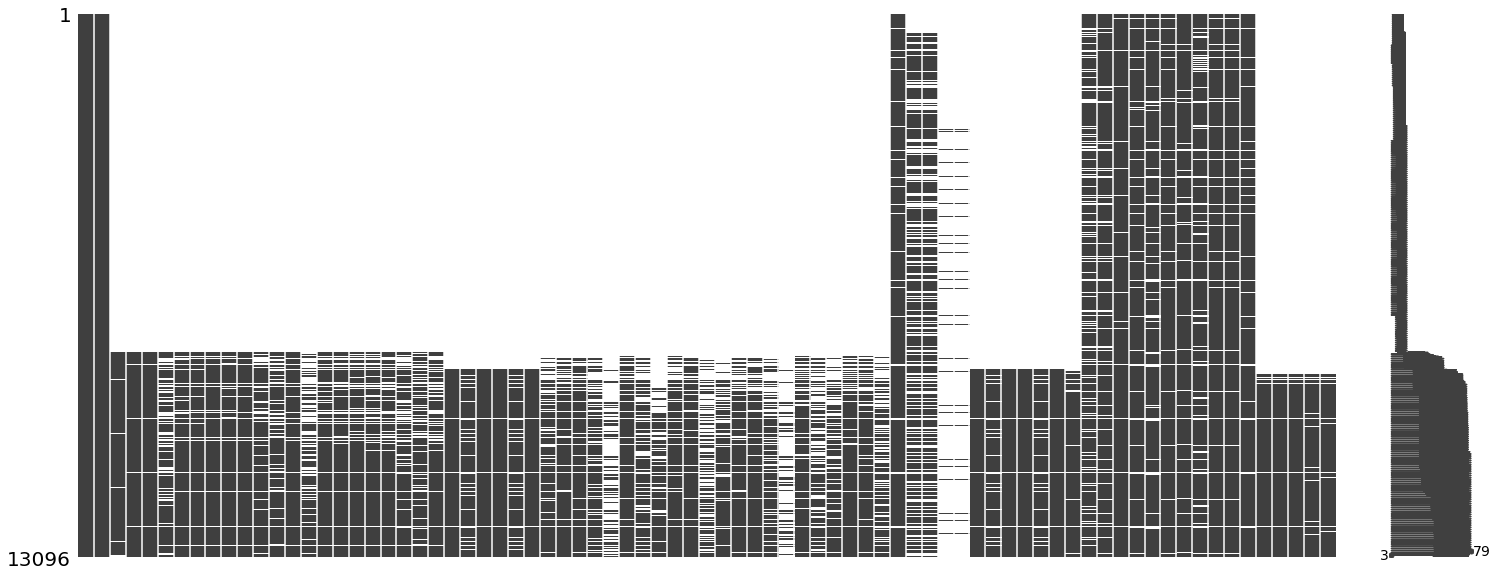

In [10]:
msn.matrix(state)

In the structure of the dataset, we can observe several "NAN" spaces. Even so, we can see that in last years (bottom of the graph) the data get more information.

## 2.2 Cross Sectional Analysis

<a id="Cross"></a>

### 2.2.1 Statistics of price houses by number of bedrooms
<a id="statnbeds"></a>

###### Reducing dataframe with columns related to number of bedrooms

In [11]:
houses_nbedrooms=state[["Date", "RegionName", "MedianListingPrice_1Bedroom", 
                        "MedianListingPrice_2Bedroom", "MedianListingPrice_3Bedroom",
                       "MedianListingPrice_4Bedroom", "MedianListingPrice_5BedroomOrMore",
                       "MedianRentalPrice_1Bedroom", "MedianRentalPrice_2Bedroom",
                       "MedianRentalPrice_3Bedroom", "MedianRentalPrice_4Bedroom",
                       "MedianRentalPrice_5BedroomOrMore", "ZHVI_1bedroom", "ZHVI_2bedroom",
                       "ZHVI_3bedroom", "ZHVI_4bedroom", "ZHVI_5BedroomOrMore"]]

In [12]:
houses_nbedrooms.dtypes

Date                                 datetime64[ns]
RegionName                                   object
MedianListingPrice_1Bedroom                 float64
MedianListingPrice_2Bedroom                 float64
MedianListingPrice_3Bedroom                 float64
MedianListingPrice_4Bedroom                 float64
MedianListingPrice_5BedroomOrMore           float64
MedianRentalPrice_1Bedroom                  float64
MedianRentalPrice_2Bedroom                  float64
MedianRentalPrice_3Bedroom                  float64
MedianRentalPrice_4Bedroom                  float64
MedianRentalPrice_5BedroomOrMore            float64
ZHVI_1bedroom                               float64
ZHVI_2bedroom                               float64
ZHVI_3bedroom                               float64
ZHVI_4bedroom                               float64
ZHVI_5BedroomOrMore                         float64
dtype: object

In [13]:
houses_nbedrooms.head()

,Date,RegionName,MedianListingPrice_1Bedroom,MedianListingPrice_2Bedroom,MedianListingPrice_3Bedroom,MedianListingPrice_4Bedroom,MedianListingPrice_5BedroomOrMore,MedianRentalPrice_1Bedroom,MedianRentalPrice_2Bedroom,MedianRentalPrice_3Bedroom,MedianRentalPrice_4Bedroom,MedianRentalPrice_5BedroomOrMore,ZHVI_1bedroom,ZHVI_2bedroom,ZHVI_3bedroom,ZHVI_4bedroom,ZHVI_5BedroomOrMore
0,1996-04-30,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61500.0,48900.0,78200.0,146500.0,206300.0
1,1996-04-30,Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59200.0,86400.0,96100.0,128400.0,190500.0
2,1996-04-30,Arkansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53000.0,54500.0,76800.0,135100.0,186000.0
3,1996-04-30,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93700.0,123400.0,150900.0,196100.0,265300.0
4,1996-04-30,Colorado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77800.0,97500.0,129000.0,176100.0,212900.0


##### Creating new variable that measures relation price houses and rent

In [14]:
houses_nbedrooms["value_rent_1bedroom"]=houses_nbedrooms.apply(lambda row: 
                                                               (row.MedianRentalPrice_1Bedroom*12)/
                                                               row.MedianListingPrice_1Bedroom, axis=1)

houses_nbedrooms["value_rent_2bedroom"]=houses_nbedrooms.apply(lambda row: 
                                                               (row.MedianRentalPrice_2Bedroom*12)/
                                                               row.MedianListingPrice_2Bedroom, axis=1)

houses_nbedrooms["value_rent_3bedroom"]=houses_nbedrooms.apply(lambda row: 
                                                               (row.MedianRentalPrice_3Bedroom*12)/
                                                               row.MedianListingPrice_3Bedroom, axis=1)

houses_nbedrooms["value_rent_4bedroom"]=houses_nbedrooms.apply(lambda row: 
                                                               (row.MedianRentalPrice_4Bedroom*12)/
                                                               row.MedianListingPrice_4Bedroom, axis=1)

houses_nbedrooms["value_rent_5bedroomOrMore"]=houses_nbedrooms.apply(lambda row: 
                                                               (row.MedianRentalPrice_5BedroomOrMore*12)/
                                                               row.MedianListingPrice_5BedroomOrMore, axis=1)


##### Extracting year from date

In [124]:
houses_nbedrooms2=houses_nbedrooms
houses_nbedrooms2["Year"]=houses_nbedrooms2.Date.dt.year

##### Creating pivot table of number of houses

In this section, I've created a pivot table that takes the median listing price of all 2017. This is a monthly dataset, so it takes the median of twelve months.

In [16]:
avghouses_nbeds=pd.pivot_table(houses_nbedrooms2, values=["MedianListingPrice_1Bedroom", 
                                          "MedianListingPrice_2Bedroom",
                                         "MedianListingPrice_3Bedroom",
                                         "MedianListingPrice_4Bedroom",
                                         "MedianListingPrice_5BedroomOrMore"], 
               index=["Year", "RegionName"], aggfunc="median" )

avghouses_nbeds2017=avghouses_nbeds.iloc[1058:1110,:]
# avghouses_nbeds2017.drop(avghouses_nbeds2017.index("UnitedStates"))
#avghouses_nbeds2017
avghouses_nbeds2017.head()

MedianListingPrice_1Bedroom  MedianListingPrice_2Bedroom  \
Year RegionName                                                             
2017 Alabama                             NaN                     125000.0   
     Alaska                         115000.0                     180000.0   
     Arizona                         86950.0                     189500.0   
     Arkansas                        99319.0                      89900.0   
     California                     329000.0                     383000.0   

                 MedianListingPrice_3Bedroom  MedianListingPrice_4Bedroom  \
Year RegionName                                                             
2017 Alabama                        169900.0                     279900.0   
     Alaska                         279000.0                     370000.0   
     Arizona                        248995.0                     327250.0   
     Arkansas                       149900.0                     273950.0   
     California                     458900.0                     599950.0   

                 MedianListingPrice_5BedroomOrMore  
Year RegionName                                     
2017 Alabama                              359500.0  
     Alaska                               475250.0  
     Arizona                              425000.0  
     Arkansas                             369700.0  
     California                           889000.0

Since there are states with no data. I've decided to eliminate them.

In [17]:
#Drop NA's
avg_houses_nbed2017_b=avghouses_nbeds2017.dropna()
avg_houses_nbed2017_b.head()

MedianListingPrice_1Bedroom  MedianListingPrice_2Bedroom  \
Year RegionName                                                             
2017 Alaska                         115000.0                     180000.0   
     Arizona                         86950.0                     189500.0   
     Arkansas                        99319.0                      89900.0   
     California                     329000.0                     383000.0   
     Colorado                       255000.0                     315000.0   

                 MedianListingPrice_3Bedroom  MedianListingPrice_4Bedroom  \
Year RegionName                                                             
2017 Alaska                         279000.0                     370000.0   
     Arizona                        248995.0                     327250.0   
     Arkansas                       149900.0                     273950.0   
     California                     458900.0                     599950.0   
     Colorado                       379000.0                     500000.0   

                 MedianListingPrice_5BedroomOrMore  
Year RegionName                                     
2017 Alaska                               475250.0  
     Arizona                              425000.0  
     Arkansas                             369700.0  
     California                           889000.0  
     Colorado                             685000.0

In [18]:
avghouses_nbeds2017.describe().iloc[1,:]

MedianListingPrice_1Bedroom          157518.542553
MedianListingPrice_2Bedroom          188254.870000
MedianListingPrice_3Bedroom          250380.640000
MedianListingPrice_4Bedroom          362372.540000
MedianListingPrice_5BedroomOrMore    493397.940000
Name: mean, dtype: float64

##### Creating histograms of prices by number of bedrooms in USA-2017

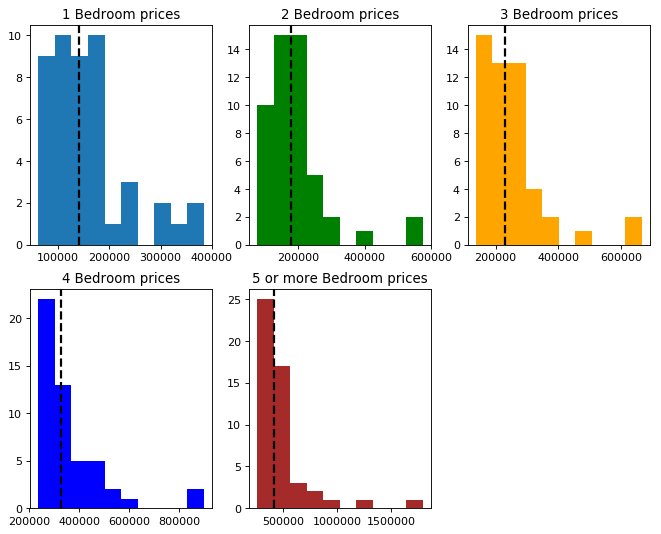

In [19]:
plt.figure(figsize=(10,8), dpi=80)

plt.subplot(2,3,1)
plt.title("1 Bedroom prices")
plt.hist(avghouses_nbeds2017.iloc[:,0].dropna())
plt.axvline(avghouses_nbeds2017.iloc[:,0].median(), color='k', linestyle='dashed', linewidth=2)

plt.subplot(2,3,2)
plt.title("2 Bedroom prices")
plt.hist(avghouses_nbeds2017.iloc[:,1].dropna(), color="green")
plt.axvline(avghouses_nbeds2017.iloc[:,1].median(), color='k', linestyle='dashed', linewidth=2)

plt.subplot(2,3,3)
plt.title("3 Bedroom prices")
plt.hist(avghouses_nbeds2017.iloc[:,2].dropna(), color="orange")
plt.axvline(avghouses_nbeds2017.iloc[:,2].median(), color='k', linestyle='dashed', linewidth=2)

plt.subplot(2,3,4)
plt.title("4 Bedroom prices")
plt.hist(avghouses_nbeds2017.iloc[:,3].dropna(), color="blue")
plt.axvline(avghouses_nbeds2017.iloc[:,3].median(), color='k', linestyle='dashed', linewidth=2)


plt.subplot(2,3,5)
plt.title("5 or more Bedroom prices")
plt.hist(avghouses_nbeds2017.iloc[:,4].dropna(), color="brown")
plt.axvline(avghouses_nbeds2017.iloc[:,4].median(), color='k', linestyle='dashed', linewidth=2)



##### Heatmaps of median prices by number of bedrooms in USA-2017

In [20]:
avghouses_nbeds2017.drop("UnitedStates", level=1, axis=0, inplace=True)

In [21]:
avghouses_nbeds2017.head()

MedianListingPrice_1Bedroom  MedianListingPrice_2Bedroom  \
Year RegionName                                                             
2017 Alabama                             NaN                     125000.0   
     Alaska                         115000.0                     180000.0   
     Arizona                         86950.0                     189500.0   
     Arkansas                        99319.0                      89900.0   
     California                     329000.0                     383000.0   

                 MedianListingPrice_3Bedroom  MedianListingPrice_4Bedroom  \
Year RegionName                                                             
2017 Alabama                        169900.0                     279900.0   
     Alaska                         279000.0                     370000.0   
     Arizona                        248995.0                     327250.0   
     Arkansas                       149900.0                     273950.0   
     California                     458900.0                     599950.0   

                 MedianListingPrice_5BedroomOrMore  
Year RegionName                                     
2017 Alabama                              359500.0  
     Alaska                               475250.0  
     Arizona                              425000.0  
     Arkansas                             369700.0  
     California                           889000.0

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text xticklabel objects>)

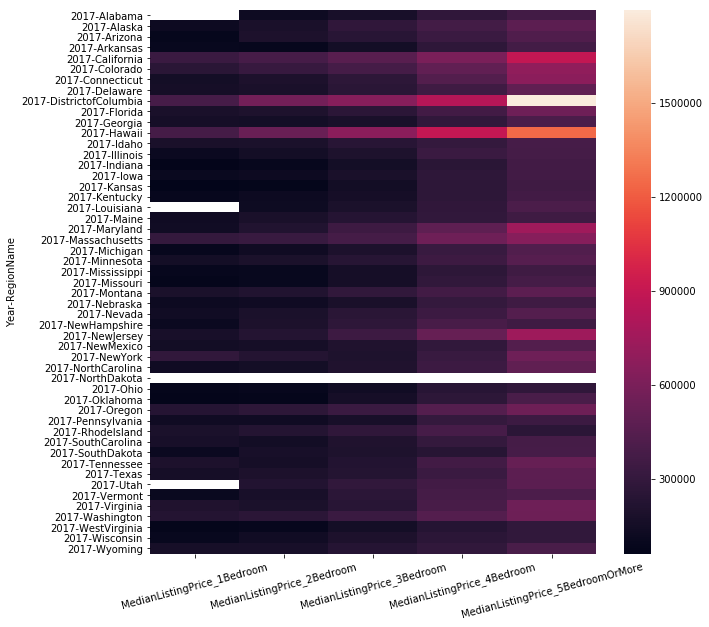

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(avghouses_nbeds2017)
plt.xticks(rotation=15)

### 2.2.2 Statistics of ratio rent_pricehouse based in number of bedrooms

<a id="statrationbeds"></a>

In [23]:
avghouses_nbedsratio=pd.pivot_table(houses_nbedrooms2, values=["value_rent_1bedroom", 
                                          "value_rent_2bedroom",
                                         "value_rent_3bedroom",
                                         "value_rent_4bedroom",
                                         "value_rent_5bedroomOrMore"], 
               index=["Year", "RegionName"], aggfunc="mean" )

avghouses_nbedsratio2017=avghouses_nbedsratio.iloc[1058:1110,:]
avghouses_nbedsratio2017.to_excel("avg_ratio2017.xlsx")
avghouses_nbedsratio2017.head()

value_rent_1bedroom  value_rent_2bedroom  \
Year RegionName                                             
2017 Alabama                     NaN             0.075490   
     Alaska                 0.096162             0.079680   
     Arizona                0.132071             0.071056   
     Arkansas               0.078910             0.092515   
     California             0.071343             0.074028   

                 value_rent_3bedroom  value_rent_4bedroom  \
Year RegionName                                             
2017 Alabama                0.071481             0.062943   
     Alaska                 0.070525             0.064545   
     Arizona                0.061094             0.051978   
     Arkansas               0.081320             0.062762   
     California             0.070574             0.058081   

                 value_rent_5bedroomOrMore  
Year RegionName                             
2017 Alabama                           NaN  
     Alaska                            NaN  
     Arizona                           NaN  
     Arkansas                          NaN  
     California                   0.045867

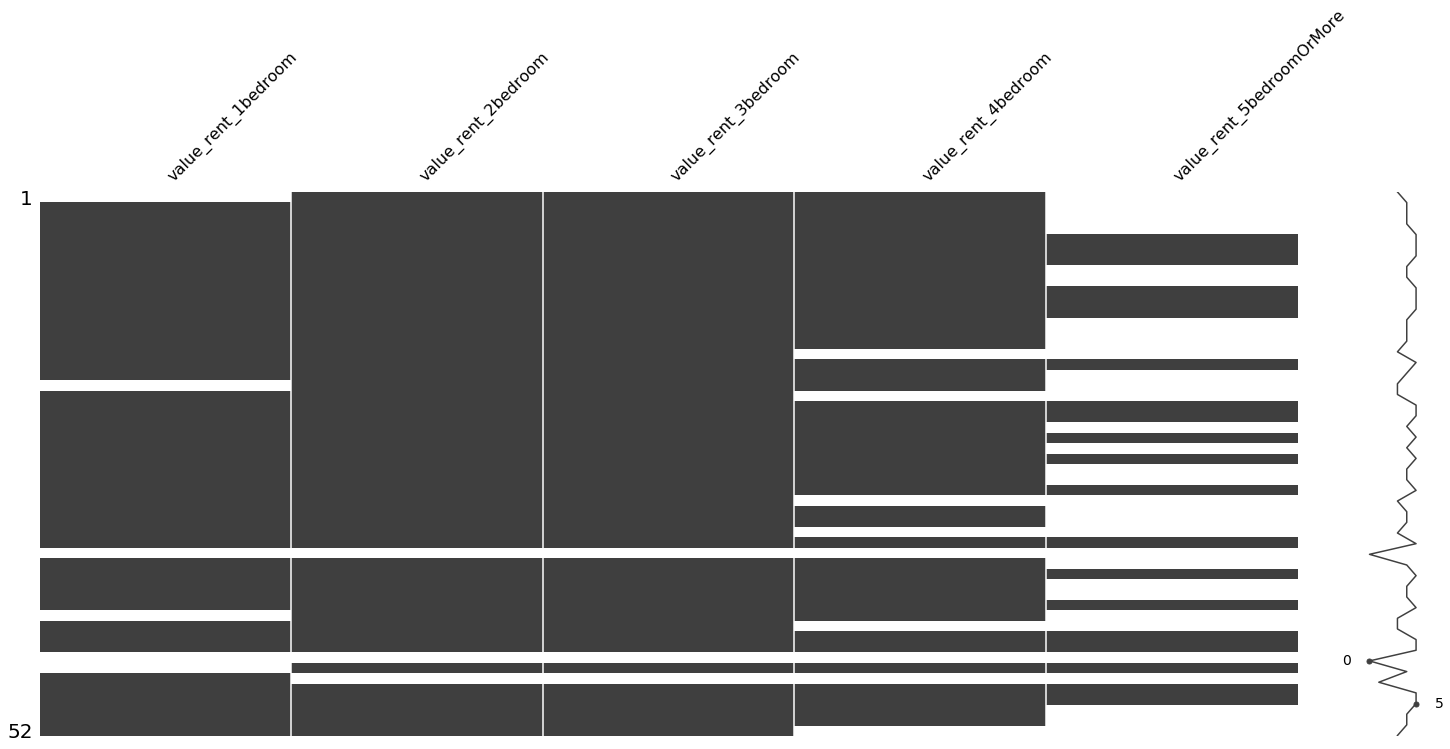

In [24]:
msn.matrix(avghouses_nbedsratio2017)

##### Creating an histogram of rent_price houses for 2017

In [25]:
avghouses_nbedsratio2017.describe().iloc[1,:]


value_rent_1bedroom          0.090088
value_rent_2bedroom          0.085167
value_rent_3bedroom          0.076301
value_rent_4bedroom          0.061128
value_rent_5bedroomOrMore    0.051073
Name: mean, dtype: float64

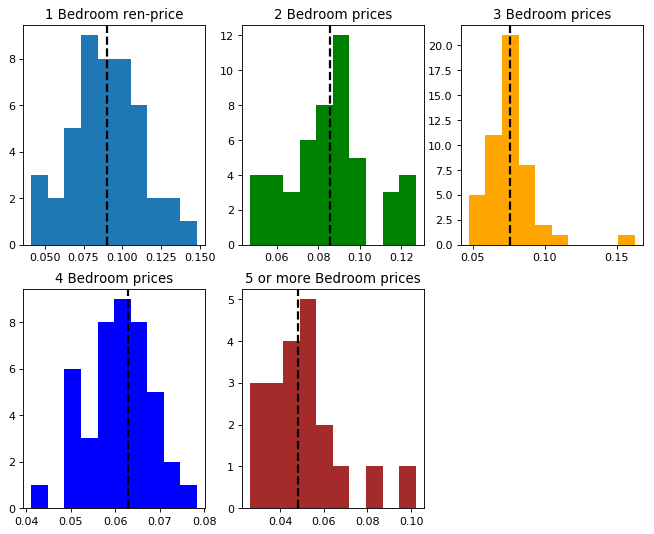

In [26]:
plt.figure(figsize=(10,8), dpi=80)

plt.subplot(2,3,1)
plt.title("1 Bedroom ren-price")
plt.hist(avghouses_nbedsratio2017.iloc[:,0].dropna())
plt.axvline(avghouses_nbedsratio2017.iloc[:,0].median(), color='k', linestyle='dashed', linewidth=2)

plt.subplot(2,3,2)
plt.title("2 Bedroom prices")
plt.hist(avghouses_nbedsratio2017.iloc[:,1].dropna(), color="green")
plt.axvline(avghouses_nbedsratio2017.iloc[:,1].median(), color='k', linestyle='dashed', linewidth=2)

plt.subplot(2,3,3)
plt.title("3 Bedroom prices")
plt.hist(avghouses_nbedsratio2017.iloc[:,2].dropna(), color="orange")
plt.axvline(avghouses_nbedsratio2017.iloc[:,2].median(), color='k', linestyle='dashed', linewidth=2)

plt.subplot(2,3,4)
plt.title("4 Bedroom prices")
plt.hist(avghouses_nbedsratio2017.iloc[:,3].dropna(), color="blue")
plt.axvline(avghouses_nbedsratio2017.iloc[:,3].median(), color='k', linestyle='dashed', linewidth=2)


plt.subplot(2,3,5)
plt.title("5 or more Bedroom prices")
plt.hist(avghouses_nbedsratio2017.iloc[:,4].dropna(), color="brown")
plt.axvline(avghouses_nbedsratio2017.iloc[:,4].median(), color='k', linestyle='dashed', linewidth=2)



##### Heatmaps of ratio anual rent/houseprice by number of bedrooms in USA-2017

In [27]:
avghouses_nbedsratio2017.drop("UnitedStates", level=1, axis=0, inplace=True)

In [28]:
avghouses_nbedsratio2017.head()

value_rent_1bedroom  value_rent_2bedroom  \
Year RegionName                                             
2017 Alabama                     NaN             0.075490   
     Alaska                 0.096162             0.079680   
     Arizona                0.132071             0.071056   
     Arkansas               0.078910             0.092515   
     California             0.071343             0.074028   

                 value_rent_3bedroom  value_rent_4bedroom  \
Year RegionName                                             
2017 Alabama                0.071481             0.062943   
     Alaska                 0.070525             0.064545   
     Arizona                0.061094             0.051978   
     Arkansas               0.081320             0.062762   
     California             0.070574             0.058081   

                 value_rent_5bedroomOrMore  
Year RegionName                             
2017 Alabama                           NaN  
     Alaska                            NaN  
     Arizona                           NaN  
     Arkansas                          NaN  
     California                   0.045867

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text xticklabel objects>)

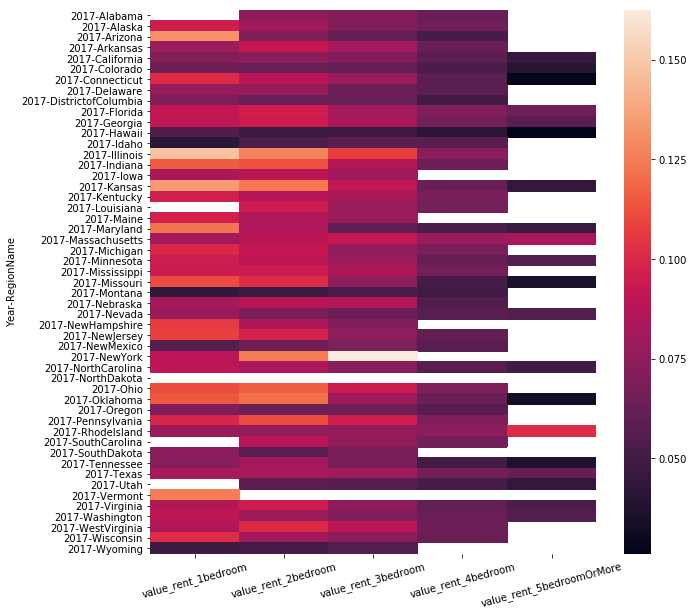

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(avghouses_nbedsratio2017)
plt.xticks(rotation=15)

### 2.2.3 Statistics of price houses by type of house

<a id="stattype"></a>

###### Reducing dataframe with columns related to number of bedrooms

In [30]:
houses_type=state[["Date", "RegionName", 'MedianListingPrice_CondoCoop', 
                        'MedianListingPrice_DuplexTriplex', 'MedianListingPrice_SingleFamilyResidence',
                        'MedianRentalPrice_CondoCoop','MedianRentalPrice_DuplexTriplex',
                         'MedianRentalPrice_SingleFamilyResidence']]

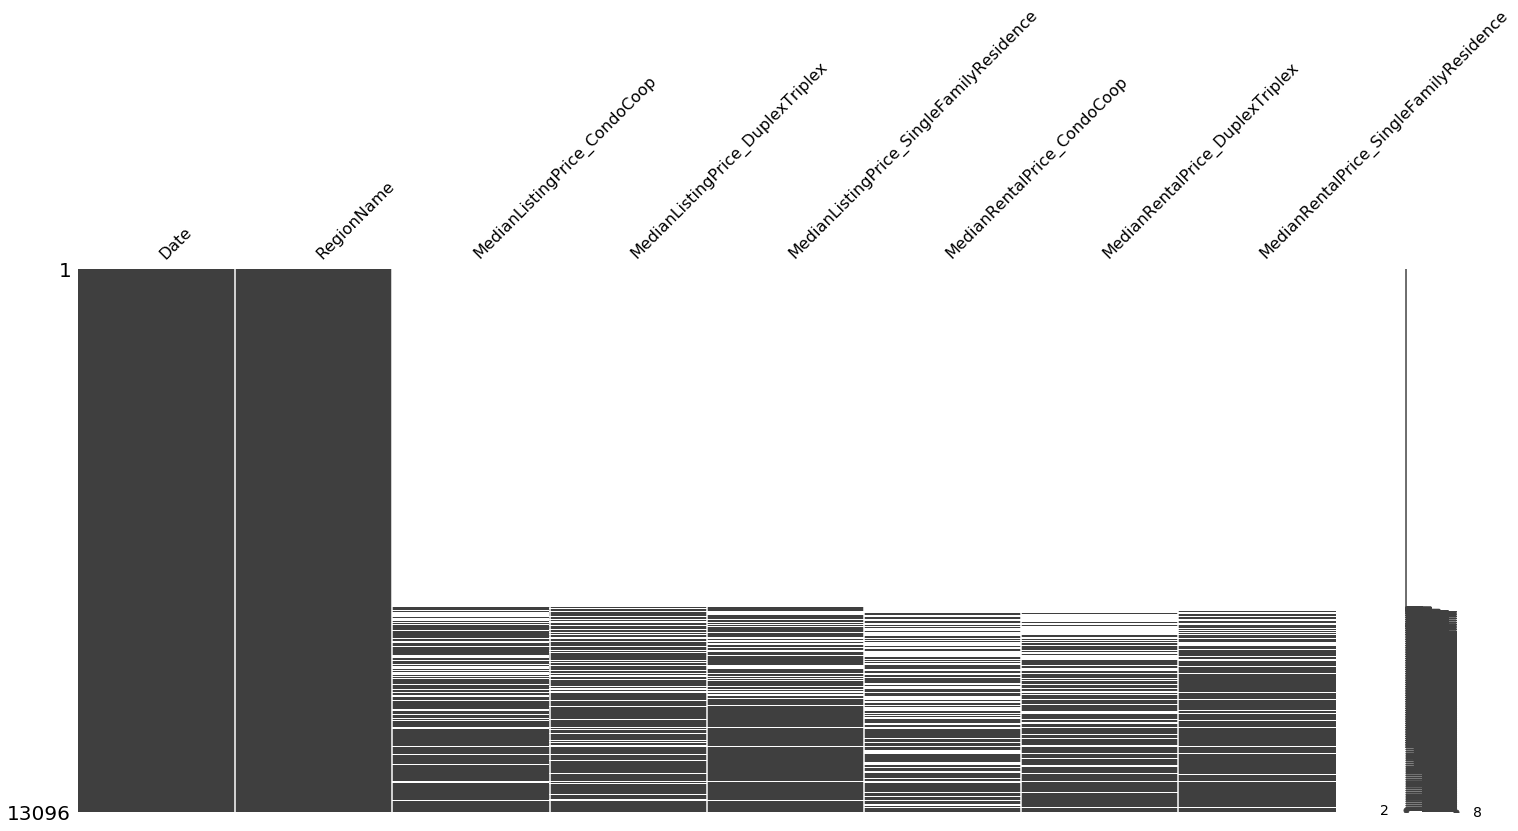

In [31]:
msn.matrix(houses_type)

In [32]:
houses_type.dtypes

Date                                        datetime64[ns]
RegionName                                          object
MedianListingPrice_CondoCoop                       float64
MedianListingPrice_DuplexTriplex                   float64
MedianListingPrice_SingleFamilyResidence           float64
MedianRentalPrice_CondoCoop                        float64
MedianRentalPrice_DuplexTriplex                    float64
MedianRentalPrice_SingleFamilyResidence            float64
dtype: object

In [33]:
houses_type.tail()

,Date,RegionName,MedianListingPrice_CondoCoop,MedianListingPrice_DuplexTriplex,MedianListingPrice_SingleFamilyResidence,MedianRentalPrice_CondoCoop,MedianRentalPrice_DuplexTriplex,MedianRentalPrice_SingleFamilyResidence
13091,2017-11-30,Virginia,250000.0,210000.0,299900.0,1650.0,925.0,1595.0
13092,2017-11-30,Washington,299000.0,375000.0,359000.0,1725.0,1332.5,1995.0
13093,2017-11-30,WestVirginia,137000.0,119900.0,149900.0,NaN,NaN,975.0
13094,2017-11-30,Wisconsin,179900.0,133000.0,193900.0,NaN,819.0,1150.0
13095,2017-11-30,Wyoming,NaN,199900.0,238000.0,NaN,725.0,1099.5


##### Creating new variable that measures relation price houses and rent

In [34]:
houses_type["value_rent_Condo"]=houses_type.apply(lambda row: 
                                                               (row.MedianRentalPrice_CondoCoop*12)/
                                                               row.MedianListingPrice_CondoCoop, axis=1)

houses_type["value_rent_DuplexTriplex"]=houses_type.apply(lambda row: 
                                                               (row.MedianRentalPrice_DuplexTriplex*12)/
                                                               row.MedianListingPrice_DuplexTriplex, axis=1)

houses_type["value_rent_SingleFamilyResidence"]=houses_type.apply(lambda row: 
                                                               (row.MedianRentalPrice_SingleFamilyResidence*12)/
                                                               row.MedianListingPrice_SingleFamilyResidence, axis=1)



In [35]:
houses_type2=houses_type
houses_type2["Year"]=houses_type2.Date.dt.year
houses_type2.head()

,Date,RegionName,MedianListingPrice_CondoCoop,MedianListingPrice_DuplexTriplex,MedianListingPrice_SingleFamilyResidence,MedianRentalPrice_CondoCoop,MedianRentalPrice_DuplexTriplex,MedianRentalPrice_SingleFamilyResidence,value_rent_Condo,value_rent_DuplexTriplex,value_rent_SingleFamilyResidence,Year
0,1996-04-30,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996
1,1996-04-30,Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996
2,1996-04-30,Arkansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996
3,1996-04-30,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996
4,1996-04-30,Colorado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996


##### Creating pivot table by type of house

In [36]:
avghouses_type=pd.pivot_table(houses_type2, values=["MedianListingPrice_CondoCoop", 
                                          "MedianListingPrice_DuplexTriplex",
                                         "MedianListingPrice_SingleFamilyResidence"], 
               index=["Year", "RegionName"], aggfunc="median" )

avghouses_type2017=avghouses_type.iloc[1058:1110,:]
# avghouses_nbeds2017.drop(avghouses_nbeds2017.index("UnitedStates"))
#avghouses_nbeds2017
avghouses_type2017.head()

MedianListingPrice_CondoCoop  \
Year RegionName                                 
2017 Alabama                         229900.0   
     Alaska                          195000.0   
     Arizona                         177000.0   
     Arkansas                        175000.0   
     California                      458000.0   

                 MedianListingPrice_DuplexTriplex  \
Year RegionName                                     
2017 Alabama                             139900.0   
     Alaska                              410000.0   
     Arizona                             250000.0   
     Arkansas                            175000.0   
     California                          699000.0   

                 MedianListingPrice_SingleFamilyResidence  
Year RegionName                                            
2017 Alabama                                     189900.0  
     Alaska                                      291950.0  
     Arizona                                     276000.0  
     Arkansas                                    160000.0  
     California                                  515000.0

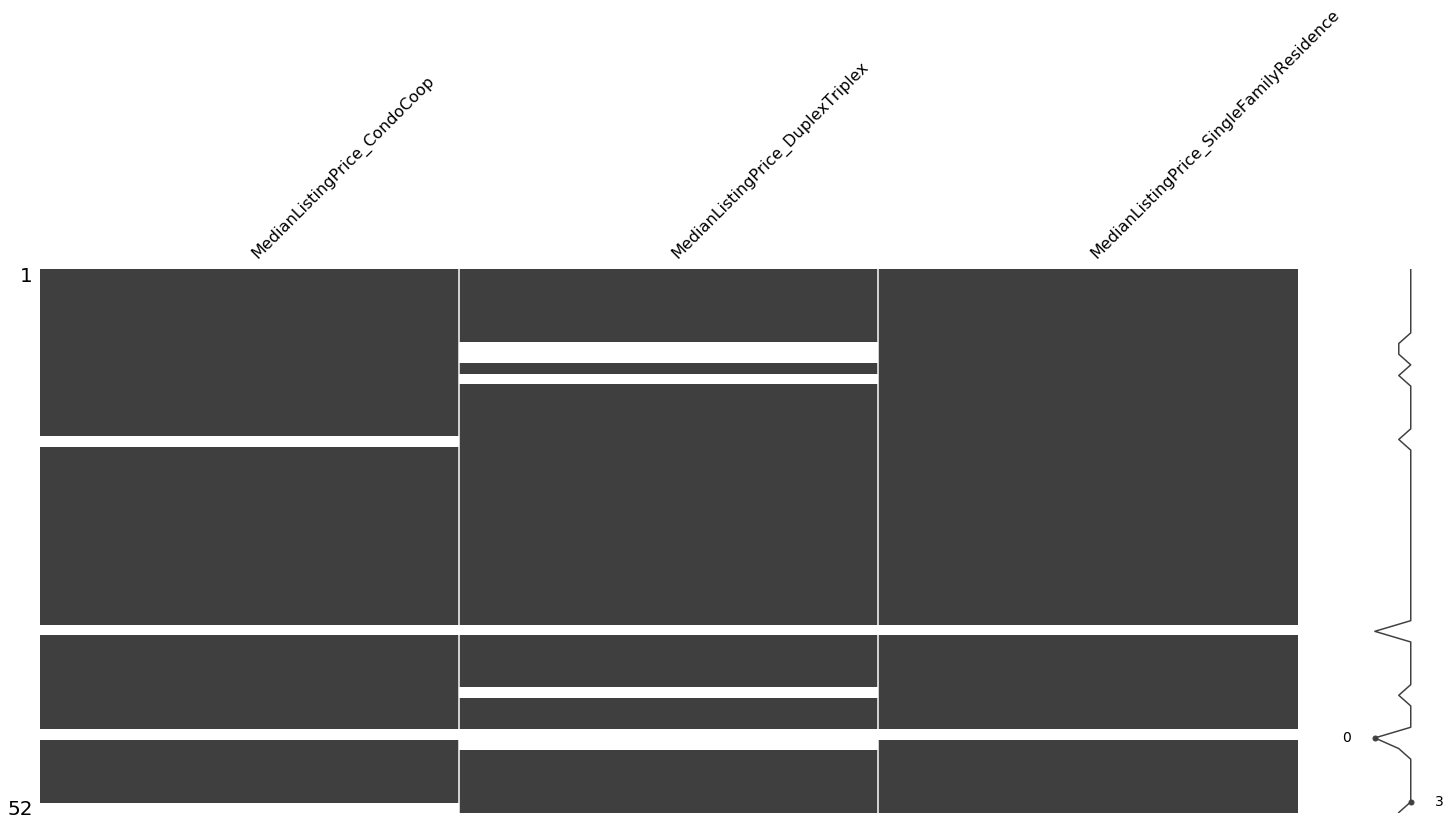

In [37]:
msn.matrix(avghouses_type2017)

In [38]:
avghouses_type2017.describe().iloc[1,:]


MedianListingPrice_CondoCoop                241370.020833
MedianListingPrice_DuplexTriplex            245342.777778
MedianListingPrice_SingleFamilyResidence    270679.500000
Name: mean, dtype: float64

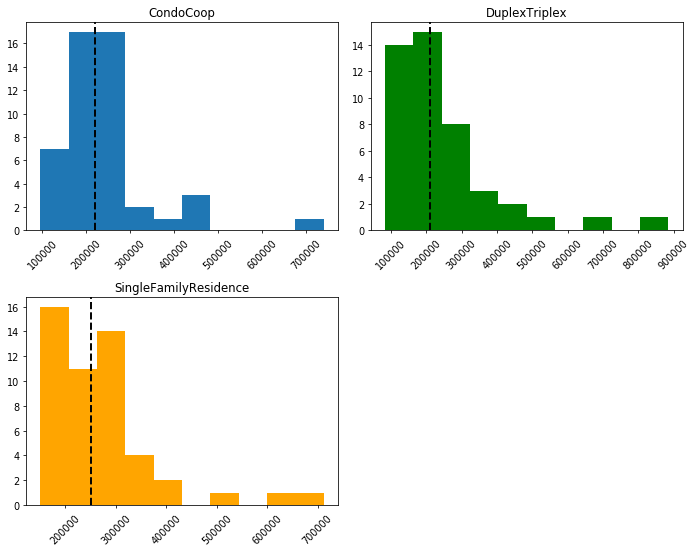

In [39]:
plt.figure(figsize=(10,8), dpi=70)

plt.subplot(2,2,1)
plt.title("CondoCoop")
plt.hist(avghouses_type2017.iloc[:,0].dropna())
plt.xticks(rotation=45)
plt.axvline(avghouses_type2017.iloc[:,0].median(), color='k', linestyle='dashed', linewidth=2)

plt.subplot(2,2,2)
plt.title("DuplexTriplex")
plt.hist(avghouses_type2017.iloc[:,1].dropna(), color="green")
plt.xticks(rotation=45)
plt.axvline(avghouses_type2017.iloc[:,1].median(), color='k', linestyle='dashed', linewidth=2)

plt.subplot(2,2,3)
plt.title("SingleFamilyResidence")
plt.hist(avghouses_type2017.iloc[:,2].dropna(), color="orange")
plt.xticks(rotation=45)
plt.axvline(avghouses_type2017.iloc[:,2].median(), color='k', linestyle='dashed', linewidth=2)

plt.tight_layout()


##### Heatmaps of median prices by type of houses in USA-2017

In [40]:
#To drop line: United States
avghouses_type2017.drop("UnitedStates", level=1, axis=0, inplace=True)

In [41]:
avghouses_type2017.head()

MedianListingPrice_CondoCoop  \
Year RegionName                                 
2017 Alabama                         229900.0   
     Alaska                          195000.0   
     Arizona                         177000.0   
     Arkansas                        175000.0   
     California                      458000.0   

                 MedianListingPrice_DuplexTriplex  \
Year RegionName                                     
2017 Alabama                             139900.0   
     Alaska                              410000.0   
     Arizona                             250000.0   
     Arkansas                            175000.0   
     California                          699000.0   

                 MedianListingPrice_SingleFamilyResidence  
Year RegionName                                            
2017 Alabama                                     189900.0  
     Alaska                                      291950.0  
     Arizona                                     276000.0  
     Arkansas                                    160000.0  
     California                                  515000.0

(array([0.5, 1.5, 2.5]), <a list of 3 Text xticklabel objects>)

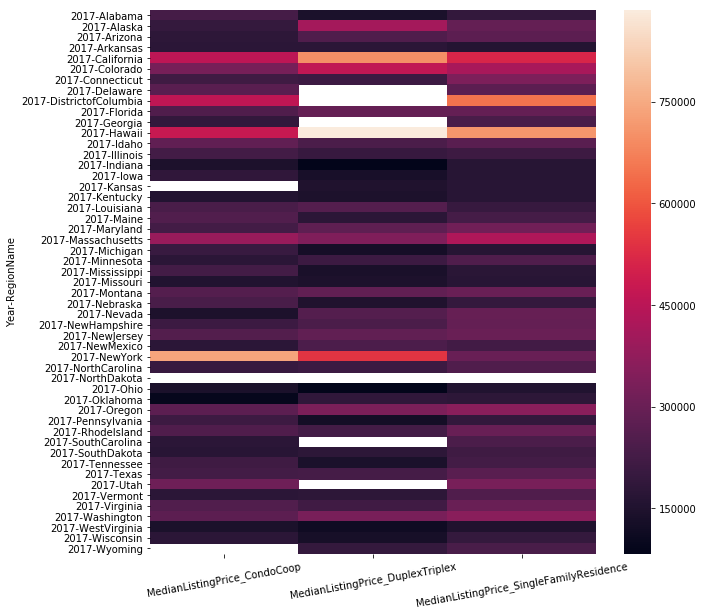

In [42]:
plt.figure(figsize=(10,10))
sns.heatmap(avghouses_type2017)
plt.xticks(rotation=10)

### 2.2.4 Statistics of ratio rent/price houses by type of house

<a id="statratiotype"></a>

In [43]:
avghouses_typeratio=pd.pivot_table(houses_type2, values=["value_rent_Condo", 
                                          "value_rent_DuplexTriplex",
                                         "value_rent_SingleFamilyResidence"], 
               index=["Year", "RegionName"], aggfunc="mean" )

avghouses_typeratio2017=avghouses_typeratio.iloc[1058:1110,:]
# avghouses_typeratio2017.to_excel("avg_typeratio2017.xlsx")
avghouses_typeratio2017.head()

value_rent_Condo  value_rent_DuplexTriplex  \
Year RegionName                                               
2017 Alabama             0.051928                  0.056801   
     Alaska              0.087026                  0.034328   
     Arizona             0.080015                  0.040496   
     Arkansas            0.062007                  0.044887   
     California          0.067820                  0.031920   

                 value_rent_SingleFamilyResidence  
Year RegionName                                    
2017 Alabama                             0.064443  
     Alaska                              0.069207  
     Arizona                             0.059921  
     Arkansas                            0.079464  
     California                          0.062042

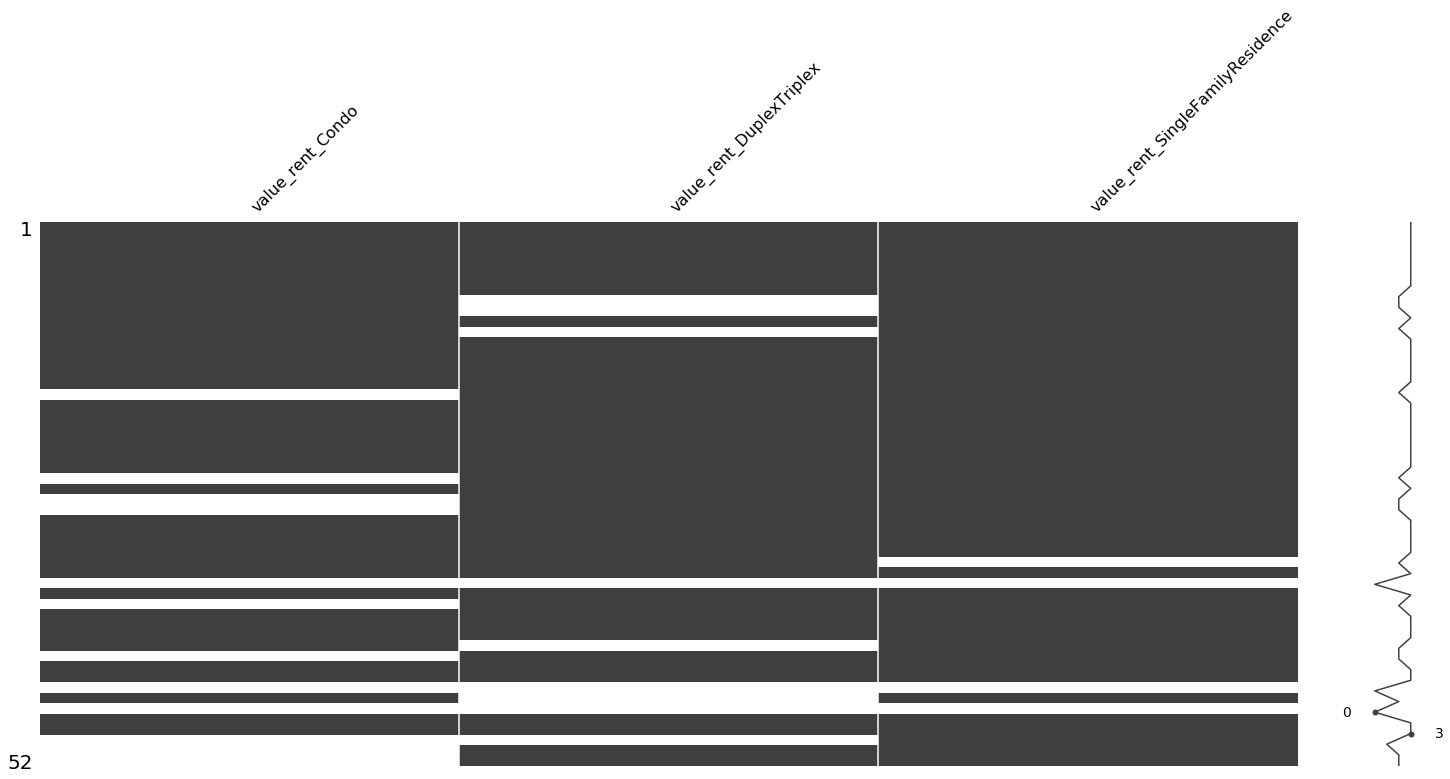

In [44]:
msn.matrix(avghouses_typeratio2017)

In [45]:
avghouses_typeratio2017.describe().iloc[1,:]

value_rent_Condo                    0.073264
value_rent_DuplexTriplex            0.057848
value_rent_SingleFamilyResidence    0.069076
Name: mean, dtype: float64

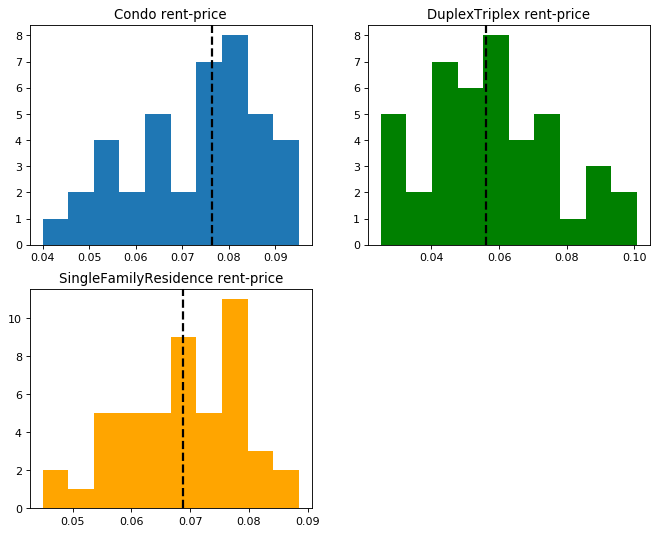

In [46]:
plt.figure(figsize=(10,8), dpi=80)

plt.subplot(2,2,1)
plt.title("Condo rent-price")
plt.hist(avghouses_typeratio2017.iloc[:,0].dropna())
plt.axvline(avghouses_typeratio2017.iloc[:,0].median(), color='k', linestyle='dashed', linewidth=2)

plt.subplot(2,2,2)
plt.title("DuplexTriplex rent-price")
plt.hist(avghouses_typeratio2017.iloc[:,1].dropna(), color="green")
plt.axvline(avghouses_typeratio2017.iloc[:,1].median(), color='k', linestyle='dashed', linewidth=2)

plt.subplot(2,2,3)
plt.title("SingleFamilyResidence rent-price")
plt.hist(avghouses_typeratio2017.iloc[:,2].dropna(), color="orange")
plt.axvline(avghouses_typeratio2017.iloc[:,2].median(), color='k', linestyle='dashed', linewidth=2)


##### Heatmaps of ratio rent-median prices by type of houses in USA-2017

In [47]:
avghouses_typeratio2017.drop("UnitedStates", level=1, axis=0, inplace=True)

In [48]:
avghouses_typeratio2017.head()

value_rent_Condo  value_rent_DuplexTriplex  \
Year RegionName                                               
2017 Alabama             0.051928                  0.056801   
     Alaska              0.087026                  0.034328   
     Arizona             0.080015                  0.040496   
     Arkansas            0.062007                  0.044887   
     California          0.067820                  0.031920   

                 value_rent_SingleFamilyResidence  
Year RegionName                                    
2017 Alabama                             0.064443  
     Alaska                              0.069207  
     Arizona                             0.059921  
     Arkansas                            0.079464  
     California                          0.062042

(array([0.5, 1.5, 2.5]), <a list of 3 Text xticklabel objects>)

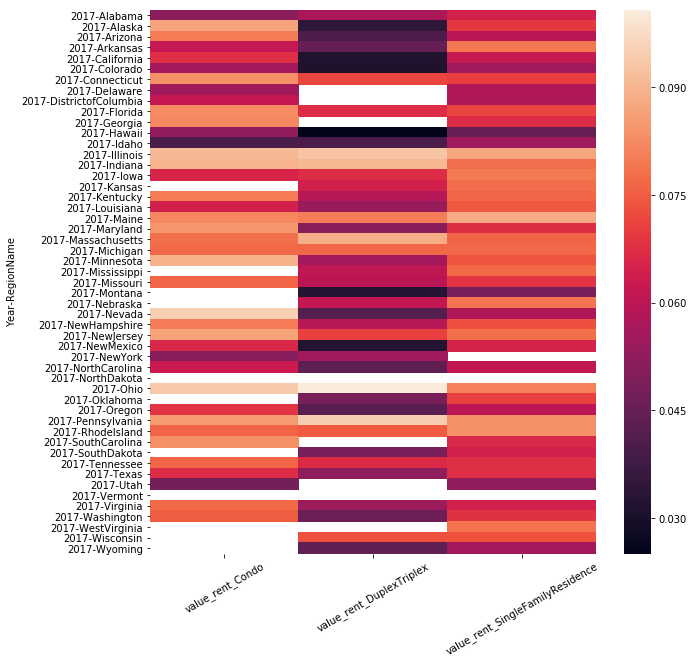

In [49]:
plt.figure(figsize=(10,10))
sns.heatmap(avghouses_typeratio2017)
plt.xticks(rotation=30)

## 2.3 Time Series Analysis

<a id="Time"></a>

For time series statistical analysis, the project focus in nbedrooms which somehow are associated to the size of a house. Additionally, those features have less missings than other columns. 

### 2.3.1 Historic Price tendency by type of bedroom

<a id="Time1a"></a>

In [50]:
houses_nbedrooms.tail()

,Date,RegionName,MedianListingPrice_1Bedroom,MedianListingPrice_2Bedroom,MedianListingPrice_3Bedroom,MedianListingPrice_4Bedroom,MedianListingPrice_5BedroomOrMore,MedianRentalPrice_1Bedroom,MedianRentalPrice_2Bedroom,MedianRentalPrice_3Bedroom,...,ZHVI_2bedroom,ZHVI_3bedroom,ZHVI_4bedroom,ZHVI_5BedroomOrMore,value_rent_1bedroom,value_rent_2bedroom,value_rent_3bedroom,value_rent_4bedroom,value_rent_5bedroomOrMore,Year
13091,2017-11-30,Virginia,207750.0,185000.0,248900.0,389900.0,550000.0,1480.0,1500.0,1500.0,...,170600.0,221600.0,368600.0,532300.0,0.085487,0.097297,0.072318,0.060015,0.052364,2017
13092,2017-11-30,Washington,233950.0,264950.0,330000.0,444900.0,569990.0,1650.0,1661.0,1875.0,...,286500.0,344600.0,461700.0,576400.0,0.084633,0.075229,0.068182,0.061902,0.050843,2017
13093,2017-11-30,WestVirginia,82000.0,89900.0,149000.0,232750.0,279900.0,575.0,750.0,1100.0,...,NaN,113900.0,155500.0,181200.0,0.084146,0.100111,0.088591,0.061869,NaN,2017
13094,2017-11-30,Wisconsin,99900.0,144900.0,194000.0,249900.0,269900.0,845.0,950.0,1200.0,...,127900.0,169100.0,221900.0,260300.0,0.101502,0.078675,0.074227,0.065306,NaN,2017
13095,2017-11-30,Wyoming,165000.0,174600.0,233900.0,293200.0,415000.0,650.0,750.0,1050.0,...,158000.0,208700.0,232800.0,282400.0,0.047273,0.051546,0.053869,NaN,NaN,2017


An important step was to create a table where each column represents a state and its characteristics. For example: Alabama 1bedroom prices from 1996 to 2017. 

In [51]:
#Transforming dataset dates for rows and states for columns
aux_stocks1=houses_nbedrooms
aux_stocks1=aux_stocks1.set_index(["Date","RegionName"])
aux_stocks1=aux_stocks1[['ZHVI_1bedroom', 'ZHVI_2bedroom', 'ZHVI_3bedroom', 'ZHVI_4bedroom', 
                 'ZHVI_5BedroomOrMore']]
aux_stocks1=aux_stocks1.unstack(level="RegionName")
aux_stocks1.head()

ZHVI_1bedroom                                               \
RegionName       Alabama Alaska  Arizona Arkansas California Colorado   
Date                                                                    
1996-04-30       61500.0    NaN  59200.0  53000.0    93700.0  77800.0   
1996-05-31       60400.0    NaN  59200.0  53300.0    92900.0  77100.0   
1996-06-30       59900.0    NaN  59200.0  53400.0    92000.0  76100.0   
1996-07-31       59200.0    NaN  59500.0  53100.0    91600.0  75400.0   
1996-08-31       58600.0    NaN  59500.0  52900.0    91300.0  75000.0   

                                                              ...    \
RegionName Connecticut Delaware DistrictofColumbia  Florida   ...     
Date                                                          ...     
1996-04-30     64700.0  90100.0                NaN  45400.0   ...     
1996-05-31     64400.0  89300.0                NaN  45100.0   ...     
1996-06-30     64100.0  89000.0                NaN  44700.0   ...     
1996-07-31     63400.0  86900.0                NaN  44400.0   ...     
1996-08-31     62900.0  83800.0                NaN  44000.0   ...     

           ZHVI_5BedroomOrMore                                         \
RegionName           Tennessee Texas UnitedStates      Utah   Vermont   
Date                                                                    
1996-04-30            198700.0   NaN          NaN  166700.0       NaN   
1996-05-31            198900.0   NaN          NaN  167500.0  166200.0   
1996-06-30            199000.0   NaN          NaN  168200.0  169800.0   
1996-07-31            199100.0   NaN          NaN  169000.0  173200.0   
1996-08-31            199500.0   NaN          NaN  169900.0  171400.0   

                                                                
RegionName  Virginia Washington WestVirginia Wisconsin Wyoming  
Date                                                            
1996-04-30  228700.0   197200.0      68600.0       NaN     NaN  
1996-05-31  227700.0   196500.0      69700.0       NaN     NaN  
1996-06-30  227000.0   195800.0      71500.0       NaN     NaN  
1996-07-31  226600.0   195600.0      73400.0       NaN     NaN  
1996-08-31  226600.0   195600.0      74400.0       NaN     NaN  

[5 rows x 260 columns]

#### Graph of General tendency 1996-2017

In [52]:
#aux_stocks1b=aux_stocks1.UnitedStates
stocks_generaltendency=aux_stocks1.mean(axis=1, level=0)
stocks_generaltendency.tail()

,ZHVI_1bedroom,ZHVI_2bedroom,ZHVI_3bedroom,ZHVI_4bedroom,ZHVI_5BedroomOrMore
Date,,,,,
2017-07-31,149311.627907,173889.361702,217025.490196,312569.387755,409279.166667
2017-08-31,150179.069767,174765.957447,217809.803922,313500.000000,410170.833333
2017-09-30,151025.581395,175887.234043,218988.235294,314924.489796,411712.500000
2017-10-31,151895.348837,177048.936170,220188.235294,316279.591837,413145.833333
2017-11-30,152597.674419,177844.680851,220933.333333,317142.857143,414043.750000


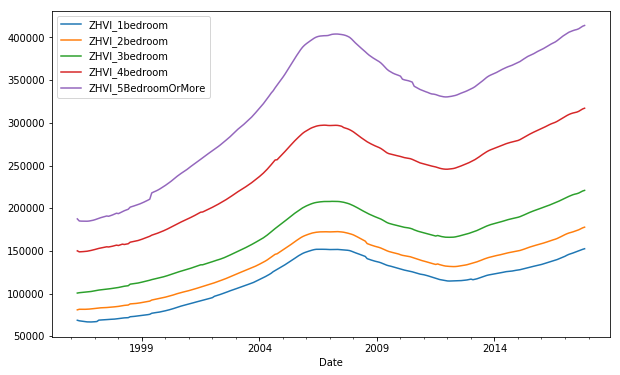

In [53]:
stocks_generaltendency.plot(figsize=(10,6), legend=True)


### 2.3.2 Reduced time frame (Period 2010-2017)

<a id="Time1b"></a>

#### Reducing the date frame from 2010 to 2017 (After financial crisis)

In [54]:
aux_stock1_reduced=aux_stocks1.iloc[165:260,:]

##### Combining multilevel columns to have just one level column

In [55]:
# aux_stock1_reduced.columns

#### Creating a foorloop to drop columns with more than 5% missings

In [56]:
aux_stock1_reduced_b=aux_stock1_reduced.loc[:, aux_stock1_reduced.notnull().sum()>len(aux_stock1_reduced)*.95]

In [57]:
print("The shape of original stock1_reduced is: ", aux_stock1_reduced.shape)
print("The shape of stock1_reduced_b is: ", aux_stock1_reduced_b.shape)

The shape of original stock1_reduced is:  (95, 260)
The shape of stock1_reduced_b is:  (95, 232)


### 2.3.3  Generating the returns series for all combinations house-state
<a id="Time1c"></a>

In [58]:
#Generating the return by house
stocks1_final=aux_stock1_reduced_b.pct_change()

#Reindexing from two levels to one level (columns)
stocks1_final.columns = ['_'.join(col) for col in stocks1_final.columns]

stocks1_final

,ZHVI_1bedroom_Alabama,ZHVI_1bedroom_Alaska,ZHVI_1bedroom_Arizona,ZHVI_1bedroom_Arkansas,ZHVI_1bedroom_California,ZHVI_1bedroom_Colorado,ZHVI_1bedroom_Connecticut,ZHVI_1bedroom_Delaware,ZHVI_1bedroom_DistrictofColumbia,ZHVI_1bedroom_Florida,...,ZHVI_5BedroomOrMore_Pennsylvania,ZHVI_5BedroomOrMore_RhodeIsland,ZHVI_5BedroomOrMore_SouthDakota,ZHVI_5BedroomOrMore_Tennessee,ZHVI_5BedroomOrMore_Utah,ZHVI_5BedroomOrMore_Vermont,ZHVI_5BedroomOrMore_Virginia,ZHVI_5BedroomOrMore_Washington,ZHVI_5BedroomOrMore_WestVirginia,ZHVI_5BedroomOrMore_Wisconsin
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-28,-0.018661,-0.017625,-0.017672,-0.009524,0.003645,0.007273,0.001406,-0.027008,0.008920,-0.008463,...,0.001808,0.007082,-0.002302,-0.000308,-0.026042,-0.042046,0.002929,0.001242,-0.007308,-0.005376
2010-03-31,0.002237,0.008580,-0.014815,0.003606,-0.012710,-0.006498,-0.004213,-0.004383,0.002210,-0.024182,...,-0.002887,0.000227,0.005076,-0.003083,-0.000357,-0.001965,-0.002504,-0.004962,0.004294,0.000450
2010-04-30,0.006696,-0.003867,-0.029001,-0.001198,-0.006437,-0.002907,-0.002116,0.004402,0.007561,-0.016035,...,-0.000362,0.004763,0.001837,-0.001237,-0.003923,-0.010174,-0.000209,-0.002992,-0.000611,0.000900
2010-05-31,0.003326,-0.006211,-0.029867,0.000000,-0.005090,-0.005102,-0.004947,0.005113,0.007192,-0.014815,...,-0.001448,0.001806,0.001375,-0.000929,-0.006445,-0.005305,-0.000418,-0.004751,-0.003056,0.000450
2010-06-30,-0.003315,-0.005469,-0.014823,0.001199,-0.006977,-0.009524,-0.006392,-0.005814,0.001863,-0.016541,...,-0.002175,-0.004281,-0.000915,-0.002479,-0.007928,-0.000667,-0.002512,-0.007035,-0.005518,-0.000450
2010-07-31,-0.002217,-0.007070,-0.015046,-0.008383,-0.009836,-0.007396,-0.003574,-0.005848,0.000620,-0.019878,...,-0.002907,-0.003394,-0.002749,-0.003417,-0.007265,0.002001,-0.004196,-0.007844,-0.004316,-0.001799
2010-08-31,0.002222,-0.012658,-0.022327,-0.006039,-0.009461,-0.002981,-0.003587,-0.004412,0.000929,-0.021841,...,-0.004738,-0.004087,-0.003215,-0.003741,-0.005854,0.005659,-0.004846,-0.008926,-0.001858,-0.002704
2010-09-30,0.007761,-0.009615,-0.030048,0.001215,-0.009074,-0.002242,-0.006479,-0.012555,0.000619,-0.019139,...,-0.004028,-0.005928,-0.001843,0.000000,-0.006257,0.002979,-0.004658,-0.009007,-0.001241,-0.003615


In [59]:
stocks1_final.shape

(95, 232)

#### Generating the table of prices in one column index

In [60]:
#Reindexing from two levels to one level (columns)
stocks1_final_prices=aux_stock1_reduced_b.copy()
stocks1_final_prices.columns = ['_'.join(col) for col in stocks1_final_prices.columns]

In [61]:
stocks1_final_prices

,ZHVI_1bedroom_Alabama,ZHVI_1bedroom_Alaska,ZHVI_1bedroom_Arizona,ZHVI_1bedroom_Arkansas,ZHVI_1bedroom_California,ZHVI_1bedroom_Colorado,ZHVI_1bedroom_Connecticut,ZHVI_1bedroom_Delaware,ZHVI_1bedroom_DistrictofColumbia,ZHVI_1bedroom_Florida,...,ZHVI_5BedroomOrMore_Pennsylvania,ZHVI_5BedroomOrMore_RhodeIsland,ZHVI_5BedroomOrMore_SouthDakota,ZHVI_5BedroomOrMore_Tennessee,ZHVI_5BedroomOrMore_Utah,ZHVI_5BedroomOrMore_Vermont,ZHVI_5BedroomOrMore_Virginia,ZHVI_5BedroomOrMore_Washington,ZHVI_5BedroomOrMore_WestVirginia,ZHVI_5BedroomOrMore_Wisconsin
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-31,91100.0,130500.0,96200.0,84000.0,219500.0,137500.0,142200.0,140700.0,313900.0,70900.0,...,276600.0,437700.0,217200.0,324500.0,288000.0,318700.0,477900.0,402600.0,164200.0,223200.0
2010-02-28,89400.0,128200.0,94500.0,83200.0,220300.0,138500.0,142400.0,136900.0,316700.0,70300.0,...,277100.0,440800.0,216700.0,324400.0,280500.0,305300.0,479300.0,403100.0,163000.0,222000.0
2010-03-31,89600.0,129300.0,93100.0,83500.0,217500.0,137600.0,141800.0,136300.0,317400.0,68600.0,...,276300.0,440900.0,217800.0,323400.0,280400.0,304700.0,478100.0,401100.0,163700.0,222100.0
2010-04-30,90200.0,128800.0,90400.0,83400.0,216100.0,137200.0,141500.0,136900.0,319800.0,67500.0,...,276200.0,443000.0,218200.0,323000.0,279300.0,301600.0,478000.0,399900.0,163600.0,222300.0
2010-05-31,90500.0,128000.0,87700.0,83400.0,215000.0,136500.0,140800.0,137600.0,322100.0,66500.0,...,275800.0,443800.0,218500.0,322700.0,277500.0,300000.0,477800.0,398000.0,163100.0,222400.0
2010-06-30,90200.0,127300.0,86400.0,83500.0,213500.0,135200.0,139900.0,136800.0,322700.0,65400.0,...,275200.0,441900.0,218300.0,321900.0,275300.0,299800.0,476600.0,395200.0,162200.0,222300.0
2010-07-31,90000.0,126400.0,85100.0,82800.0,211400.0,134200.0,139400.0,136000.0,322900.0,64100.0,...,274400.0,440400.0,217700.0,320800.0,273300.0,300400.0,474600.0,392100.0,161500.0,221900.0
2010-08-31,90200.0,124800.0,83200.0,82300.0,209400.0,133800.0,138900.0,135400.0,323200.0,62700.0,...,273100.0,438600.0,217000.0,319600.0,271700.0,302100.0,472300.0,388600.0,161200.0,221300.0
2010-09-30,90900.0,123600.0,80700.0,82400.0,207500.0,133500.0,138000.0,133700.0,323400.0,61500.0,...,272000.0,436000.0,216600.0,319600.0,270000.0,303000.0,470100.0,385100.0,161000.0,220500.0


### 2.3.4 Generating the top10 house-state portfolio returns
<a id="Time1d"></a>

In [62]:
#Generating top10 assets (By mean)
report_stocks1=stocks1_final.describe()
report_stocks1=report_stocks1.iloc[1:3,:]
report_stocks1=report_stocks1.T.sort_values(by="mean", ascending=False)
report_stocks1=report_stocks1.iloc[0:10,:]
report_stocks1

,mean,std
ZHVI_2bedroom_Nevada,0.006272,0.012651
ZHVI_3bedroom_Nevada,0.006061,0.009885
ZHVI_3bedroom_DistrictofColumbia,0.005971,0.005987
ZHVI_2bedroom_Colorado,0.005821,0.005925
ZHVI_1bedroom_California,0.005517,0.010179
ZHVI_1bedroom_Florida,0.005249,0.010312
ZHVI_1bedroom_Colorado,0.005218,0.006697
ZHVI_2bedroom_California,0.005210,0.007778
ZHVI_4bedroom_Nevada,0.005140,0.009500
ZHVI_3bedroom_Colorado,0.005013,0.004712


In [63]:
#Generating a list with names of top10 assets
activos=report_stocks1.T.columns
activos=activos.tolist()
activos

['ZHVI_2bedroom_Nevada',
 'ZHVI_3bedroom_Nevada',
 'ZHVI_3bedroom_DistrictofColumbia',
 'ZHVI_2bedroom_Colorado',
 'ZHVI_1bedroom_California',
 'ZHVI_1bedroom_Florida',
 'ZHVI_1bedroom_Colorado',
 'ZHVI_2bedroom_California',
 'ZHVI_4bedroom_Nevada',
 'ZHVI_3bedroom_Colorado']

### Graph of top ten (highest) returns

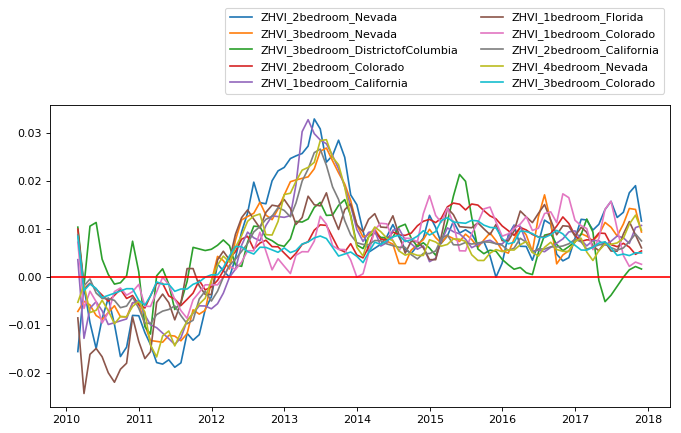

In [64]:
figure1=plt.figure(figsize=(10,5), dpi=80)
top10=stocks1_final.loc[:,activos] #Selecting columns of top10 assets
plt.plot(top10)
plt.axhline(y=0, color='red', linestyle='-')
# plt.title("Top 10 historic returns")
plt.legend(top10, loc=4, bbox_to_anchor=(0., 1.02, 1., .102), ncol=2)

### Graph of top ten (highest) returns expressed in prices

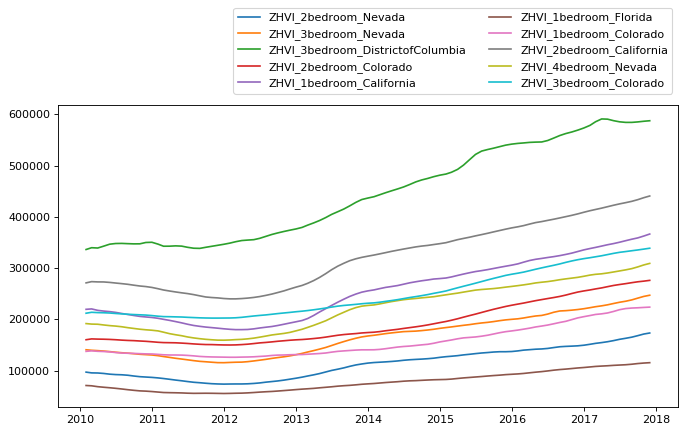

In [65]:
figure2=plt.figure(figsize=(10,5), dpi=80)
top10b=stocks1_final_prices.loc[:,activos] #Selecting columns of top10 assets
plt.plot(top10b)
# plt.title("Top 10 historic returns")
plt.legend(top10b, loc=4, bbox_to_anchor=(0., 1.02, 1., .102), ncol=2)

In [66]:
top10b.describe().T

,count,mean,std,min,25%,50%,75%,max
ZHVI_2bedroom_Nevada,95.0,113044.210526,29449.096781,73600.0,86200.0,114600.0,137000.0,173300.0
ZHVI_3bedroom_Nevada,95.0,167083.157895,39964.879935,115400.0,130650.0,167500.0,199450.0,247000.0
ZHVI_3bedroom_DistrictofColumbia,95.0,445504.210526,91594.927988,336200.0,350100.0,436600.0,540800.0,590900.0
ZHVI_2bedroom_Colorado,95.0,191530.526316,40836.664986,149900.0,157950.0,174200.0,226300.0,276000.0
ZHVI_1bedroom_California,95.0,255536.842105,58630.879332,179900.0,200750.0,255500.0,304650.0,366400.0
ZHVI_1bedroom_Florida,95.0,77961.052632,18781.703947,55300.0,60700.0,74100.0,92450.0,115400.0
ZHVI_1bedroom_Colorado,95.0,155783.157895,30619.909573,126000.0,131450.0,140500.0,176650.0,223800.0
ZHVI_2bedroom_California,95.0,322032.631579,63947.159773,239900.0,262500.0,323200.0,377150.0,440600.0
ZHVI_4bedroom_Nevada,95.0,222846.315789,47189.457014,159300.0,178100.0,227100.0,263500.0,309100.0
ZHVI_3bedroom_Colorado,95.0,248521.052632,44811.904513,202400.0,209900.0,231400.0,286850.0,338700.0


#  <font color = '#001122AA'> 3. Prediction and Optimization Models

<a id="Modelos"></a>

<img src="Graph3.png" width="170px" height="170px">

## 3.1 Optimization

<a id="Optimization"></a>

### 3.1.1 Creating the optimal weight portfolio

<a id="Optimizationa"></a>

NOTE: I've used R Portfolio Analytics to create the optimal portfolio' between the highest top10 investment return

## 3.2 Prediction with ARIMA
<a id="Arima"></a>

In [67]:
#Cleaning the first column which is NA
top10=top10.drop(top10.index[0])

In [68]:
top10.to_csv("top10.csv")

### 3.2.1 Analyzing stationarity of stock houses
<a id="Arima_a"></a>

In [69]:
lista1=list(top10.columns)

lista2a=[]
for z in lista1:
    test_kpss1=stattools.kpss(top10[z], regression="c")
    lista2a.append(test_kpss1[1])
    
lista2b=[]
for zz in lista2a:
    if zz>0.05:
        a="Level Stationary"
        lista2b.append(a)
    else:
        b="Non Level stationary"
        lista2b.append(b)
        
lista3a=[]
for w in lista1:
    test_kpss2=stattools.kpss(top10[w], regression="ct")
    lista3a.append(test_kpss2[1])

lista3b=[]
for zz in lista3a:
    if zz>0.05:
        aa="Trend Stationary"
        lista3b.append(aa)
    else:
        bb="Non Trend stationary"
        lista3b.append(bb)

In [70]:
kpss_test=list(zip(lista1, lista2a, lista2b, lista3a, lista3b))


In [71]:
kpss_test_df=pd.DataFrame(kpss_test)
kpss_test_df

,0,1,2,3,4
0,ZHVI_2bedroom_Nevada,0.100000,Level Stationary,0.067595,Trend Stationary
1,ZHVI_3bedroom_Nevada,0.100000,Level Stationary,0.061405,Trend Stationary
2,ZHVI_3bedroom_DistrictofColumbia,0.100000,Level Stationary,0.032255,Non Trend stationary
3,ZHVI_2bedroom_Colorado,0.026001,Non Level stationary,0.036572,Non Trend stationary
4,ZHVI_1bedroom_California,0.100000,Level Stationary,0.060075,Trend Stationary
5,ZHVI_1bedroom_Florida,0.050170,Level Stationary,0.022147,Non Trend stationary
6,ZHVI_1bedroom_Colorado,0.016145,Non Level stationary,0.032714,Non Trend stationary
7,ZHVI_2bedroom_California,0.100000,Level Stationary,0.080860,Trend Stationary
8,ZHVI_4bedroom_Nevada,0.100000,Level Stationary,0.057709,Trend Stationary
9,ZHVI_3bedroom_Colorado,0.027997,Non Level stationary,0.031121,Non Trend stationary


### 3.2.2 Autoarima selection

<a id="Arima_b"></a>

#### Generating the sequence pdq for arima combinations

In [72]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

#### 3.2.2.1 Autoarima for one asset

#### Generating table of all arima combinations pdq for the selected stock

In [73]:
#Iterating the ARIMA models
bic=[]
for aa in pdq:
    try:
        arima=tsa.ARIMA(top10.iloc[:,0], order=aa).fit()
        bic.append(arima.bic)
    except:
        pass

In [74]:
#Obtaining the chose ARIMA
results=list(zip(pdq, bic))
results

aa=pd.DataFrame(results)
aa=aa.sort_values(by=1, ascending=True)
print("The choicen ARIMA is: ", aa.iloc[0,0] )
aa

The choicen ARIMA is:  (1, 0, 1)


,0,1
5,"(1, 0, 1)",-769.172496
3,"(0, 1, 1)",-764.904683
4,"(1, 0, 0)",-763.525639
7,"(1, 1, 1)",-763.244716
2,"(0, 1, 0)",-760.910921
6,"(1, 1, 0)",-757.792237
1,"(0, 0, 1)",-645.521015
0,"(0, 0, 0)",-546.722784


#### 3.2.2.2 Autoarima for all assets

#### Generating list of all arima combinations pdq for the top ten stocks

In [75]:
#Loop for all assets
bic_arima = [] 
for x in range(len(top10.columns)): 
    for y in pdq: 
        try:
            arima=tsa.ARIMA(top10.iloc[:,x], order=y).fit()
            bic_arima.append((x,y,arima.bic))
        except:
            pass

##### Converting list to a dataframe of all arima combinations pdq for the top ten stocks

In [76]:
df_bic_arima=pd.DataFrame(bic_arima)
df_bic_arima=df_bic_arima.rename(columns={0:"stock", 1:"arima",2:"bic"})
df_bic_arima.head(15)

,stock,arima,bic
0,0,"(0, 0, 0)",-546.722784
1,0,"(0, 0, 1)",-645.521015
2,0,"(0, 1, 0)",-760.910921
3,0,"(0, 1, 1)",-764.904683
4,0,"(1, 0, 0)",-763.525639
5,0,"(1, 0, 1)",-769.172496
6,0,"(1, 1, 0)",-757.792237
7,0,"(1, 1, 1)",-763.244716
8,1,"(0, 0, 0)",-593.111574
9,1,"(0, 0, 1)",-700.241930


##### Selecting the lowest bic for each stock (Best arima by stock)

In [77]:
selected_rows=df_bic_arima.groupby("stock")[["arima", "bic"]].idxmin()
# selected_rows=selected_rows.set_index("bic")

###### Creating the reduced table with best arimas 

In [78]:
tabla_arima2=pd.merge(df_bic_arima, selected_rows, left_index=True, right_index=True, how="inner")
tabla_arima2

,stock,arima,bic_x,bic_y
0,0,"(0, 0, 0)",-546.722784,5.0
1,0,"(0, 0, 1)",-645.521015,13.0
2,0,"(0, 1, 0)",-760.910921,21.0
3,0,"(0, 1, 1)",-764.904683,28.0
4,0,"(1, 0, 0)",-763.525639,37.0
5,0,"(1, 0, 1)",-769.172496,44.0
6,0,"(1, 1, 0)",-757.792237,53.0
7,0,"(1, 1, 1)",-763.244716,61.0
8,1,"(0, 0, 0)",-593.111574,69.0
9,1,"(0, 0, 1)",-700.241930,76.0


##### Unstacking and creating a dataframe with ARIMA with stock as each column

In [79]:
top10lista=top10.columns.tolist()
top10lista

['ZHVI_2bedroom_Nevada',
 'ZHVI_3bedroom_Nevada',
 'ZHVI_3bedroom_DistrictofColumbia',
 'ZHVI_2bedroom_Colorado',
 'ZHVI_1bedroom_California',
 'ZHVI_1bedroom_Florida',
 'ZHVI_1bedroom_Colorado',
 'ZHVI_2bedroom_California',
 'ZHVI_4bedroom_Nevada',
 'ZHVI_3bedroom_Colorado']

In [80]:
tabla_arima=df_bic_arima.set_index(["stock", "arima"])
tabla_arima=tabla_arima.unstack("stock")
# tabla_arima.columns=tabla_arima.columns.droplevel() #To erase one level of columns
tabla_arima.columns=top10lista 
tabla_arima

,ZHVI_2bedroom_Nevada,ZHVI_3bedroom_Nevada,ZHVI_3bedroom_DistrictofColumbia,ZHVI_2bedroom_Colorado,ZHVI_1bedroom_California,ZHVI_1bedroom_Florida,ZHVI_1bedroom_Colorado,ZHVI_2bedroom_California,ZHVI_4bedroom_Nevada,ZHVI_3bedroom_Colorado
arima,,,,,,,,,,
"(0, 0, 0)",-546.722784,-593.111574,-687.369326,-689.316636,-587.589527,-585.149866,-666.300016,-638.164574,-600.580074,-732.402499
"(0, 0, 1)",-645.521015,-700.241930,-761.402240,-784.731126,-694.180014,-680.716248,-756.536795,-745.658167,-702.755810,-828.579461
"(0, 1, 0)",-760.910921,-829.634196,-758.752210,-887.440005,-810.975169,-775.438359,-795.755881,-879.867641,-845.474666,-925.134031
"(0, 1, 1)",-764.904683,-849.062650,-765.591010,-884.106066,-814.343328,-773.099443,-797.047298,-887.525495,-856.149918,-921.669944
"(1, 0, 0)",-763.525639,-832.925818,-772.504862,-893.630355,-815.590663,-780.068158,-804.717398,-884.769918,-848.885959,-931.911596
"(1, 0, 1)",-769.172496,-854.182187,-786.558837,-890.885497,-820.777851,-775.535287,-811.049265,-893.160741,-860.678424,-929.117671
"(1, 1, 0)",-757.792237,-831.789683,-757.237856,-883.813964,-811.054459,-771.123842,-792.207019,-887.353216,-850.547815,-921.273041
"(1, 1, 1)",-763.244716,-845.075921,-762.493962,-879.847921,-810.213210,-769.519314,-796.934645,-883.199254,-851.694062,NaN


### 3.2.3 Running best ARIMA for top10 stocks

<a id="Arima_c"></a>

In [81]:
lista_order=tabla_arima2.iloc[:,1]
lista_order=lista_order.tolist()  #Getting arimas as a list
lista_activo=tabla_arima2.index.values.tolist() #Getting the table as a list
activo_order=list(zip(lista_activo, lista_order))
activo_order

[(0, (0, 0, 0)),
 (1, (0, 0, 1)),
 (2, (0, 1, 0)),
 (3, (0, 1, 1)),
 (4, (1, 0, 0)),
 (5, (1, 0, 1)),
 (6, (1, 1, 0)),
 (7, (1, 1, 1)),
 (8, (0, 0, 0)),
 (9, (0, 0, 1))]

#### 3.2.3.1 Running ARIMA with loops

In [82]:
arima_reg=[]
for x,y in activo_order:
    try:
        arima=tsa.ARIMA(top10.iloc[:,x], order=y).fit().summary()
        arima_reg.append((x,y,arima))
    except:
        pass

In [83]:
arima_reg

[(1, (0, 0, 1), <class 'statsmodels.iolib.summary.Summary'>
  """
                                 ARMA Model Results                               
  Dep. Variable:     ZHVI_3bedroom_Nevada   No. Observations:                   94
  Model:                       ARMA(0, 1)   Log Likelihood                 356.936
  Method:                         css-mle   S.D. of innovations              0.005
  Date:                  Sun, 05 May 2019   AIC                           -707.872
  Time:                          20:48:48   BIC                           -700.242
  Sample:                      02-28-2010   HQIC                          -704.790
                             - 11-30-2017                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
  ----------------------------------------------------------------------------------------------
  const                          0.0060      0.001      5.608      0.000    

### 3.2.4 ARIMA analysis best stocks according portfolio optimization
<a id="Arima_d"></a>

Even I've created a loop to generate the ARIMAS for all assets, I will run ARIMA over the recommendations in section 3.1. Based in portfolio analytics optiization, we are going to invest mainly in two assets: ZHVI_2bedroom_Nevada and ZHVI_3bedroom_DistrictofColumbia. 

#### 3.2.4.1 ARIMA ZHVI_2bedroom_Nevada

In [84]:
Nevada_2bed=top10.iloc[:,0:1]
Nevada_2bed.head()

,ZHVI_2bedroom_Nevada
Date,
2010-02-28,-0.015464
2010-03-31,-0.002094
2010-04-30,-0.009444
2010-05-31,-0.014831
2010-06-30,-0.008602


#### Checking the seasonaldecomposition for Nevada_2beds

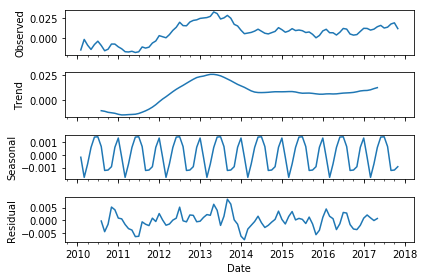

In [85]:
decomp=seasonal_decompose(Nevada_2bed)
fig0=decomp.plot()

#### Checking stationarity for Nevada_2beds

#### 1. Dickey Fuller over level serie

In [86]:
XX=Nevada_2bed.iloc[:,0].values  #Trick to read Dickey Fuller
result=adfuller(XX)

print("HO: There is unit root on level serie")
print("If pvalue is >0.10 there is unit root") #I've chosen that level of confidence
print('2Bedroom Nevada:\nADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


HO: There is unit root on level serie
If pvalue is >0.10 there is unit root
2Bedroom Nevada:
ADF Statistic: -2.276213
p-value: 0.179754
	1%: -3.508
	5%: -2.895
	10%: -2.585


#### 2. Dickey Fuller over first difference

In [87]:
Nevada_2bed_diff=Nevada_2bed.diff()
Nevada_2bed_diff.head()

Nevada_2bed_diff=Nevada_2bed_diff.drop(Nevada_2bed_diff.index[0])
Nevada_2bed_diff.head()

,ZHVI_2bedroom_Nevada
Date,
2010-03-31,0.013370
2010-04-30,-0.007350
2010-05-31,-0.005387
2010-06-30,0.006228
2010-07-31,0.004264


In [88]:
XX_diff=Nevada_2bed_diff.iloc[:,0].values  #Trick to read Dickey Fuller
result_diff=adfuller(XX_diff)

print("HO: There is unit root of first difference")
print("If pvalue is >0.10 there is unit root") #I've chosen that level of confidence
print('2Bedroom Nevada:\nADF Statistic: %f' % result_diff[0])
print('p-value: %f' % result_diff[1])
for key, value in result_diff[4].items():
    print('\t%s: %.3f' % (key, value))


HO: There is unit root of first difference
If pvalue is >0.10 there is unit root
2Bedroom Nevada:
ADF Statistic: -2.625279
p-value: 0.087884
	1%: -3.508
	5%: -2.895
	10%: -2.585


#### Checking the autocorrelation plots for Nevada_2beds (over first difference serie)

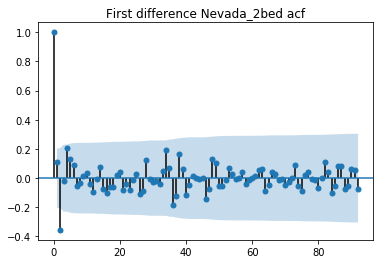

In [89]:
fig=plot_acf(Nevada_2bed_diff, title="First difference Nevada_2bed acf")

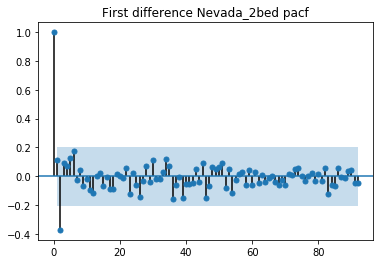

In [90]:
fig2=plot_pacf(Nevada_2bed_diff, title="First difference Nevada_2bed pacf")


#### Running the ARIMA model for Nevada_2beds

I've chosen AR=2 and MA=2 based in the autocorrelograms. According to Dickey Fuller, I've differenced once to get an statationary serie

In [91]:
arima_nev2bed=tsa.ARIMA(Nevada_2bed, order=(2,1,2)).fit(trend="nc")
arima_nev2bed.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARIMA Model Results                                
==================================================================================
Dep. Variable:     D.ZHVI_2bedroom_Nevada   No. Observations:                   93
Model:                     ARIMA(2, 1, 2)   Log Likelihood                 396.705
Method:                           css-mle   S.D. of innovations              0.003
Date:                    Sun, 05 May 2019   AIC                           -783.411
Time:                            20:48:50   BIC                           -770.748
Sample:                        03-31-2010   HQIC                          -778.298
                             - 11-30-2017                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
ar.L1.D.ZHVI_2bedroom_Nevada    -0.0830      0.243     -0.342      0.733      -0.559       0.393
ar.L2.D.ZHVI_2bedroom_Nevada    -0.5305      0.147     -3.605      0.001      -0.819      -0.242
ma.L1.D.ZHVI_2bedroom_Nevada     0.4212      0.265      1.590      0.115      -0.098       0.940
ma.L2.D.ZHVI_2bedroom_Nevada     0.1114      0.180      0.620      0.537      -0.241       0.464
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.0782           -1.3707j            1.3729           -0.2591
AR.2           -0.0782           +1.3707j            1.3729            0.2591
MA.1           -1.8902           -2.3244j            2.9960           -0.3587
MA.2           -1.8902           +2.3244j            2.9960            0.3587
-----------------------------------------------------------------------------
"""

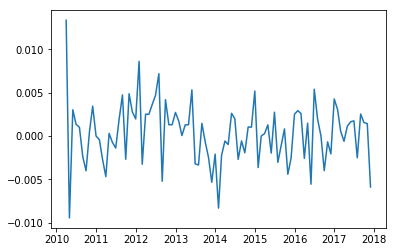

In [92]:
plt.plot(arima_nev2bed.resid)

#### Predicting with the ARIMA model for Nevada_2beds

In [93]:
arima_nev2bed.forecast(steps=1, exog=None, alpha=0.5)

(array([0.00918966]), array([0.00338468]), array([[0.00690673, 0.01147259]]))

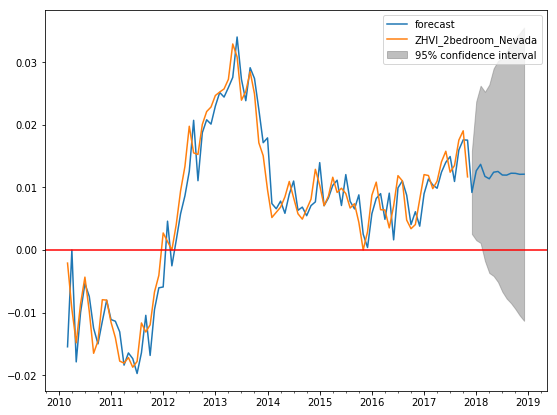

In [94]:

fig, ax = plt.subplots(figsize=(9,7))
fig = arima_nev2bed.plot_predict(start='2010-03-31', end='2018-12-31', ax=ax)
plt.axhline(y=0, color='red', linestyle='-')
# legend = ax.legend(loc='upper left')

#### 3.2.4.1 ARIMA ZHVI_3bedroom_DistrictColumbia

In [95]:
DistrictColumbia_3bed=top10.iloc[:,2:3]
DistrictColumbia_3bed.head()

,ZHVI_3bedroom_DistrictofColumbia
Date,
2010-02-28,0.010410
2010-03-31,-0.001766
2010-04-30,0.010616
2010-05-31,0.011380
2010-06-30,0.003751


#### Checking the seasonaldecomposition DistrictColumbia_3beds

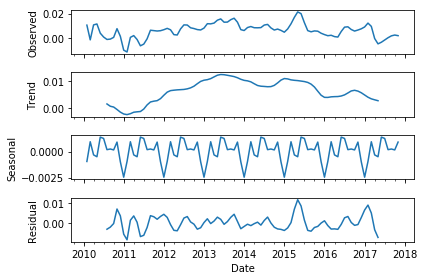

In [96]:
decomp2=seasonal_decompose(DistrictColumbia_3bed)
fig1=decomp2.plot()

#### Checking stationarity for DistrictColumbia_3beds

#### 1. Dickey Fuller over level serie

In [97]:
XY=DistrictColumbia_3bed.iloc[:,0].values  #Trick to read Dickey Fuller
result2=adfuller(XY)

print("HO: There is unit root on level serie")
print("If pvalue is >0.10 there is unit root")
print('2Bedroom Nevada:\nADF Statistic: %f' % result2[0])
print('p-value: %f' % result2[1])
for key, value in result2[4].items():
    print('\t%s: %.3f' % (key, value))

HO: There is unit root on level serie
If pvalue is >0.10 there is unit root
2Bedroom Nevada:
ADF Statistic: -1.329795
p-value: 0.615433
	1%: -3.514
	5%: -2.898
	10%: -2.586


#### 2. Dickey Fuller over first difference

In [98]:
DistrictColumbia_3bed_diff=DistrictColumbia_3bed.diff()
DistrictColumbia_3bed_diff.head()

DistrictColumbia_3bed_diff=DistrictColumbia_3bed_diff.drop(DistrictColumbia_3bed_diff.index[0])
DistrictColumbia_3bed_diff.head()

,ZHVI_3bedroom_DistrictofColumbia
Date,
2010-03-31,-0.012177
2010-04-30,0.012383
2010-05-31,0.000764
2010-06-30,-0.007629
2010-07-31,-0.003176


In [99]:
XY_diff=Nevada_2bed_diff.iloc[:,0].values  #Trick to read Dickey Fuller
result2_diff=adfuller(XY_diff)

print("HO: There is unit root of first difference")
print("If pvalue is >0.10 there is unit root") #I've chosen that level of confidence
print('2Bedroom Nevada:\nADF Statistic: %f' % result2_diff[0])
print('p-value: %f' % result2_diff[1])
for key, value in result2_diff[4].items():
    print('\t%s: %.3f' % (key, value))


HO: There is unit root of first difference
If pvalue is >0.10 there is unit root
2Bedroom Nevada:
ADF Statistic: -2.625279
p-value: 0.087884
	1%: -3.508
	5%: -2.895
	10%: -2.585


#### Checking the autocorrelation plots for DistrictColumbia_3beds

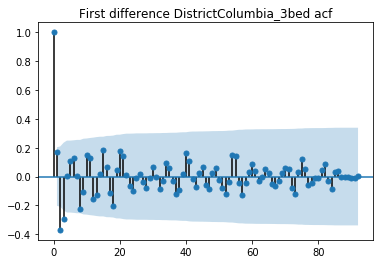

In [100]:
fig=plot_acf(DistrictColumbia_3bed_diff, title="First difference DistrictColumbia_3bed acf")

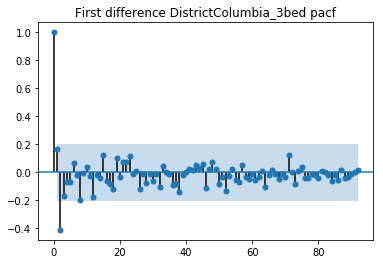

In [101]:
fig2=plot_pacf(DistrictColumbia_3bed_diff, title="First difference DistrictColumbia_3bed pacf")


#### Running the ARIMA model for DistrictColumbia_3beds

In [102]:
arima_Columbia3bed=tsa.ARIMA(DistrictColumbia_3bed, order=(2,1,3)).fit(trend="nc")
arima_Columbia3bed.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     ARIMA Model Results                                      
==============================================================================================
Dep. Variable:     D.ZHVI_3bedroom_DistrictofColumbia   No. Observations:                   93
Model:                                 ARIMA(2, 1, 3)   Log Likelihood                 401.731
Method:                                       css-mle   S.D. of innovations              0.003
Date:                                Sun, 05 May 2019   AIC                           -791.461
Time:                                        20:48:51   BIC                           -776.266
Sample:                                    03-31-2010   HQIC                          -785.326
                                         - 11-30-2017                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
ar.L1.D.ZHVI_3bedroom_DistrictofColumbia    -0.3286      0.164     -2.006      0.048      -0.650      -0.008
ar.L2.D.ZHVI_3bedroom_DistrictofColumbia    -0.2733      0.181     -1.511      0.134      -0.628       0.081
ma.L1.D.ZHVI_3bedroom_DistrictofColumbia     0.8070      0.206      3.921      0.000       0.404       1.210
ma.L2.D.ZHVI_3bedroom_DistrictofColumbia    -0.0446      0.232     -0.193      0.848      -0.499       0.409
ma.L3.D.ZHVI_3bedroom_DistrictofColumbia    -0.6953      0.199     -3.494      0.001      -1.085      -0.305
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.6013           -1.8159j            1.9129           -0.3009
AR.2           -0.6013           +1.8159j            1.9129            0.3009
MA.1           -0.7512           -0.6601j            1.0000           -0.3853
MA.2           -0.7512           +0.6601j            1.0000            0.3853
MA.3            1.4382           -0.0000j            1.4382           -0.0000
-----------------------------------------------------------------------------
"""

#### Predicting with the ARIMA model for DistrictColumbia_3beds

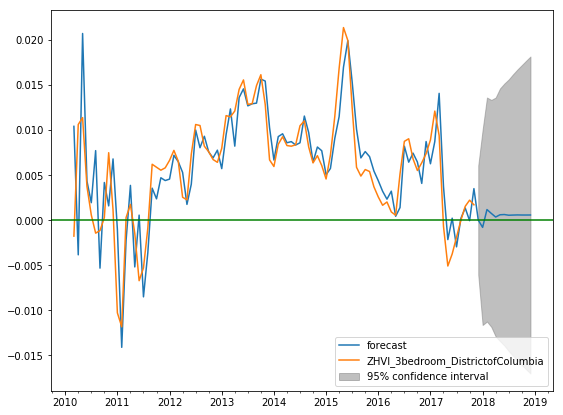

In [103]:
fig, ax = plt.subplots(figsize=(9,7))
fig = arima_Columbia3bed.plot_predict(start='2010-03-31', end='2018-12-31', ax=ax)
plt.axhline(y=0, color='green', linestyle='-')
# legend = ax.legend(loc='upper left')

## 3.3 Vector Autoregressive (Var Models)
<a id="VAR"></a>

In [104]:
top10.columns

Index(['ZHVI_2bedroom_Nevada', 'ZHVI_3bedroom_Nevada',
       'ZHVI_3bedroom_DistrictofColumbia', 'ZHVI_2bedroom_Colorado',
       'ZHVI_1bedroom_California', 'ZHVI_1bedroom_Florida',
       'ZHVI_1bedroom_Colorado', 'ZHVI_2bedroom_California',
       'ZHVI_4bedroom_Nevada', 'ZHVI_3bedroom_Colorado'],
      dtype='object')

### 3.3.1 Selecting top two assets

In [105]:
Asset_select=top10[['ZHVI_3bedroom_DistrictofColumbia', 'ZHVI_2bedroom_Nevada']]

In [106]:
Asset_select.head()

,ZHVI_3bedroom_DistrictofColumbia,ZHVI_2bedroom_Nevada
Date,,
2010-02-28,0.010410,-0.015464
2010-03-31,-0.001766,-0.002094
2010-04-30,0.010616,-0.009444
2010-05-31,0.011380,-0.014831
2010-06-30,0.003751,-0.008602


In [107]:
#Transforming assets in quartely basis
Asset_select_Q=Asset_select.groupby(pd.PeriodIndex(Asset_select.index, freq="Q"), axis=0).mean()
Asset_select_Q
Asset_select_Q2=Asset_select_Q.iloc[0:31,:]
Asset_select_Q2.shape

(31, 2)

### 3.3.2 Selecting GDP

In [108]:
gdp2a=gdp[(gdp["GeoName"]=="United States") | (gdp["GeoName"]=="Nevada") | (gdp["GeoName"]=="District of Columbia")]
gdp2b=gdp2a.iloc[5:6,:]
gdp2c=gdp2a.iloc[29:30,:]
gdp2d=gdp2a.iloc[53:54,:]
gdp2=pd.concat([gdp2b, gdp2c, gdp2d], axis=0)

In [109]:
gdp2
gdp3=gdp2.iloc[:,7:59]

In [110]:
gdp2c

,GeoFIPS,GeoName,Region,ComponentId,ComponentName,IndustryId,IndustryClassification,Description,2005:Q1,2005:Q2,...,2015:Q2,2015:Q3,2015:Q4,2016:Q1,2016:Q2,2016:Q3,2016:Q4,2017:Q1,2017:Q2,2017:Q3
221,11000,District of Columbia,2,200,Gross domestic product (GDP) by state (million...,11,23,Construction,(D),(D),...,1606,1586,1600,1617,1651,1576,1589,1610,1613,1621


In [111]:
gdp_Q=gdp3.transpose()
gdp_Q.columns=["USA", "District of Columbia", "Nevada"]
gdp_Q=gdp_Q.iloc[21:59,:]

In [112]:
gdp_Q.shape

(31, 3)

### 3.3.3 Joining tables

In [113]:
Asset_select_Q3=Asset_select_Q2.reset_index()
gdp_Q2=gdp_Q.reset_index()

In [114]:
asset_gdp=pd.concat([Asset_select_Q3, gdp_Q2], axis=1)
asset_gdp=asset_gdp.set_index("Date")

In [115]:
##GDP and Asset District of Columbia
asset_gdp_Columbia=asset_gdp.loc[:,["ZHVI_3bedroom_DistrictofColumbia", "District of Columbia"]]
asset_gdp_Columbia["District of Columbia"]=pd.to_numeric(asset_gdp_Columbia["District of Columbia"])

In [116]:
asset_gdp_Columbia_pct=asset_gdp_Columbia.pct_change()
asset_gdp_Columbia_pct.columns=["Asset", "GDP"]
asset_gdp_Columbia_pct

,Asset,GDP
Date,,
2010Q1,NaN,NaN
2010Q2,0.985706,0.080906
2010Q3,-1.078153,0.032934
2010Q4,-5.431643,0.017391
2011Q1,-3.445836,-0.017094
2011Q2,-0.705875,0.089855
2011Q3,-1.005236,0.057624
2011Q4,511.893039,0.065381
2012Q1,0.214742,0.043273


### 3.3.4 Applying VAR model for District of Columbia Asset

In [117]:
model1 = tsa.VAR(asset_gdp_Columbia_pct.values[1:,:]).fit()
model1.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 05, May, 2019
Time:                     20:48:52
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    3.24623
Nobs:                     29.0000    HQIC:                   3.05194
Log likelihood:          -119.267    FPE:                    19.3914
AIC:                      2.96334    Det(Omega_mle):         15.9260
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        10.794589        20.017553            0.539           0.594
L1.y1        -0.071295         0.197043           -0.362           0.720
L1.y2       384.835556       429.693223            0.896           0.379

Results for equation 

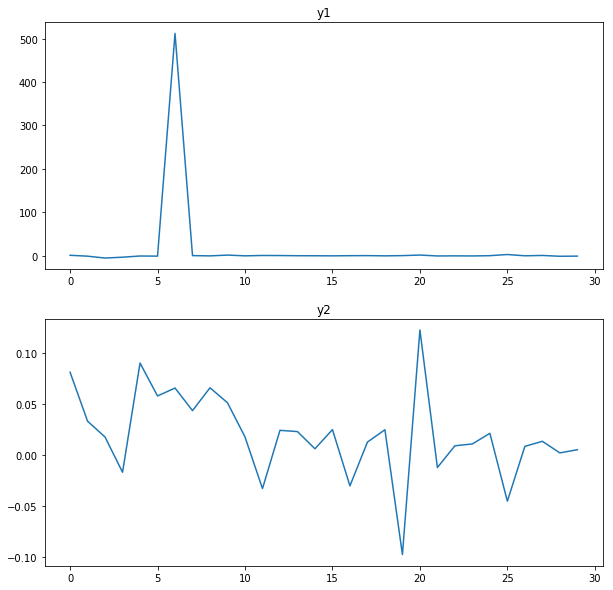

In [118]:
model1.plot()

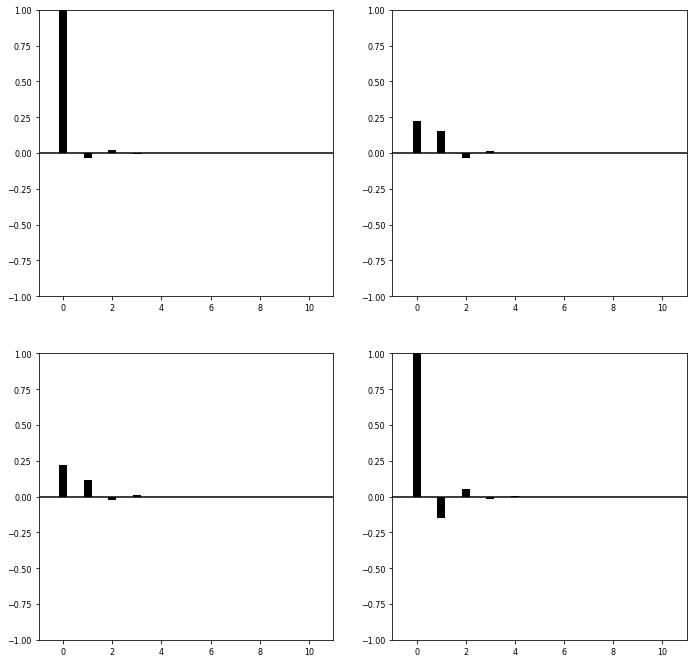

In [119]:
model1.plot_acorr()

In [120]:
irf=model1.irf(10)

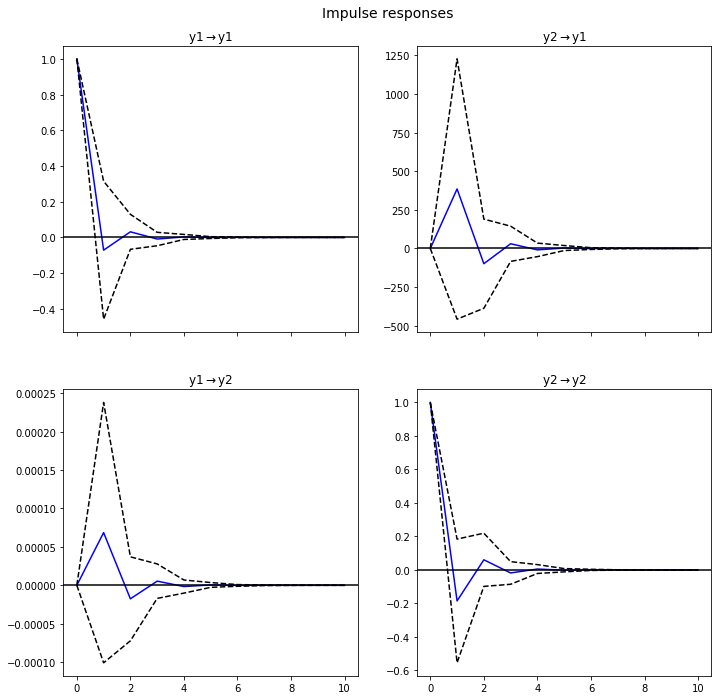

In [121]:
irf.plot()

We can see there is a positive reaction of GDP with variation of prices of the asset. It converges at the second period. The same logic applyes with asset price reaction with a variation of GDP. 

#  <font color = '#001122AA'> 4. Conclusions

<a id="Conclusion"></a>

The best combination for investment will  be in Illinois for one or two bedrooms, Kansas for one or two bedrooms and Arizona for one bedroom.

the best investment is in 2 bedroom_Nevada and 3 bedroom_District of Columbia.



## Annex: Join Reports

### Report 1: Top ten stocks returns and prediction of 3bedroom_District of Columbia

Text(0,0.5,'Returns')

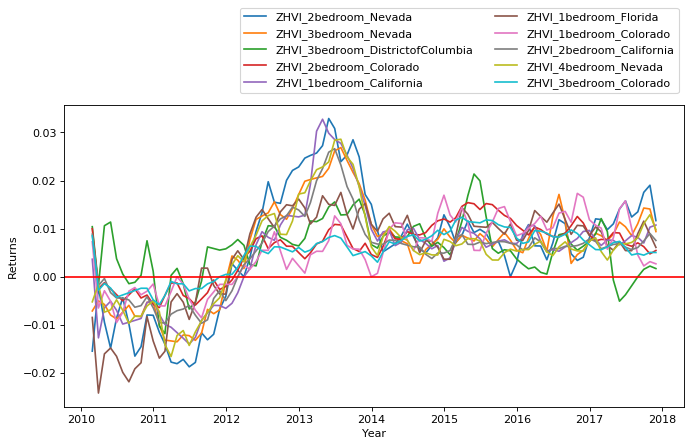

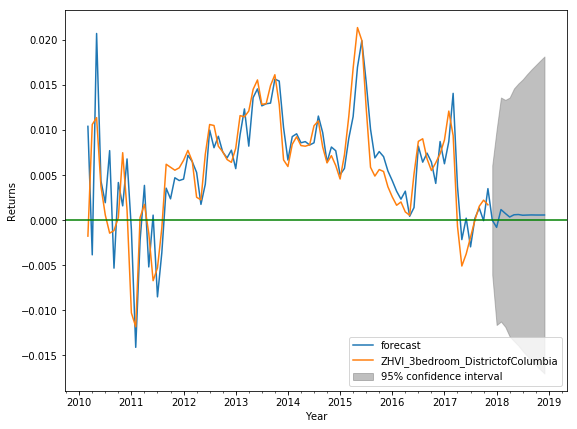

In [127]:
figure1=plt.figure(figsize=(10,5), dpi=80)
top10=stocks1_final.loc[:,activos] #Selecting columns of top10 assets
plt.plot(top10)
plt.axhline(y=0, color='red', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Returns")
# plt.title("Top 10 historic returns")
plt.legend(top10, loc=4, bbox_to_anchor=(0., 1.02, 1., .102), ncol=2)


fig, ax = plt.subplots(figsize=(9,7))
fig = arima_Columbia3bed.plot_predict(start='2010-03-31', end='2018-12-31', ax=ax)
plt.axhline(y=0, color='green', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Returns")
# legend = ax.legend(loc='upper left')

### Report 2: Impulse Response: 3bedroom_District of Columbia 

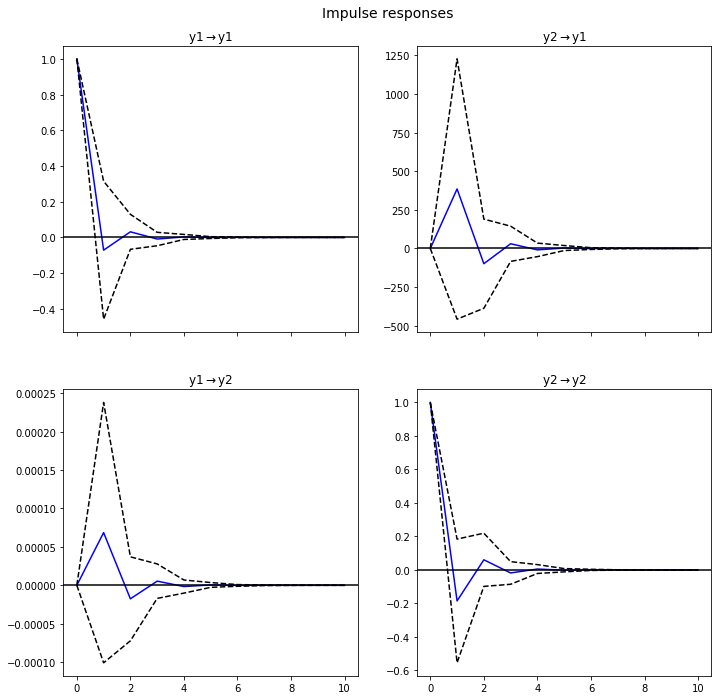

In [123]:
irf=model1.irf(10)
irf.plot()